In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

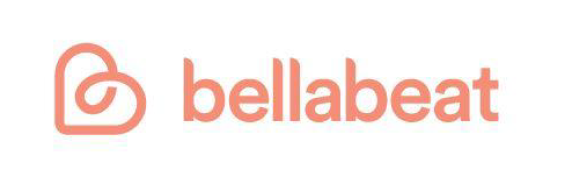

In [2]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "../input/bellabeatlogo/Bellabeat logo.png", width = 500, height = 500)


<h3><b>Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.</b>
    


<b>Products of Bellabeat:</b>

Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.


Today, I am going to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. I will also present my analysis to the with recommendations for Bellabeat’s marketing strategy.

<h4><b>The question to be answered here: Does smart device worth to invest at Bellabeat?</b>

<b>Table of Content</b>
1. [Section 1: Introduction to Python](#1)
1. [Section 2: FitBit Fitness Tracker Data](#2)
 1. [Daily Activities](#2.1)
 1. [Hourly Activities](#2.2)
 1. [Heartrate by Seconds](#2.3)     
 1. [Minute Activities](#2.4) 
 1. [Minute Sleep](#2.5)
 1. [Sleep Day](#2.6)
 1. [Weight Log Info](#2.7)
 1. [Summary and Conclusion for FitBit Data](#2.8) 
1. [Section 3: Apple Watch and Fitbit Data](#3)
1. [Section 4: Conclusion and Suggestion](#4)

<a id="1"></a> <br>
# Section 1. Fifteen (15) Leading Cause of Women's Death

According to Centers for Disease Control and Prevention (CDC), there are 15 leading causes of women's death:
[https://wonder.cdc.gov/controller/saved/D158/D321F242](https://wonder.cdc.gov/controller/saved/D158/D321F242)





In [3]:
cdc_underlying = pd.read_csv('../input/underlying-cause-of-death-2018-2021/Underlying Cause of Death 2018-2021 Single Race Results.csv')

In [4]:
cdc_underlying.head(15)

15 Leanding Causes of Death   Deaths   Population  \
0                                   Diseases of heart  310,661  167,509,003   
1                                 Malignant neoplasms  286,543  167,509,003   
2                                            COVID-19  180,283  167,509,003   
3                            Cerebrovascular diseases   92,038  167,509,003   
4                                   Alzheimer disease   82,424  167,509,003   
5                  Accidents (unintentional injuries)   75,333  167,509,003   
6                  Chronic lower respiratory diseases   74,814  167,509,003   
7                                   Diabetes mellitus   44,666  167,509,003   
8         Nephritis, nephrotic syndrome and nephrosis   25,769  167,509,003   
9   Essential hypertension and hypertensive renal ...   22,730  167,509,003   
10                Chronic liver disease and cirrhosis   20,878  167,509,003   
11                                         Septicemia   20,752  167,509,003   
12                            Influenza and pneumonia   19,544  167,509,003   
13                                  Parkinson disease   14,969  167,509,003   
14                           Nutritional deficiencies   10,900  167,509,003   

    Crude Rate Per 100,000  
0                    185.5  
1                    171.1  
2                    107.6  
3                     54.9  
4                     49.2  
5                     45.0  
6                     44.7  
7                     26.7  
8                     15.4  
9                     13.6  
10                    12.5  
11                    12.4  
12                    11.7  
13                     8.9  
14                     6.5

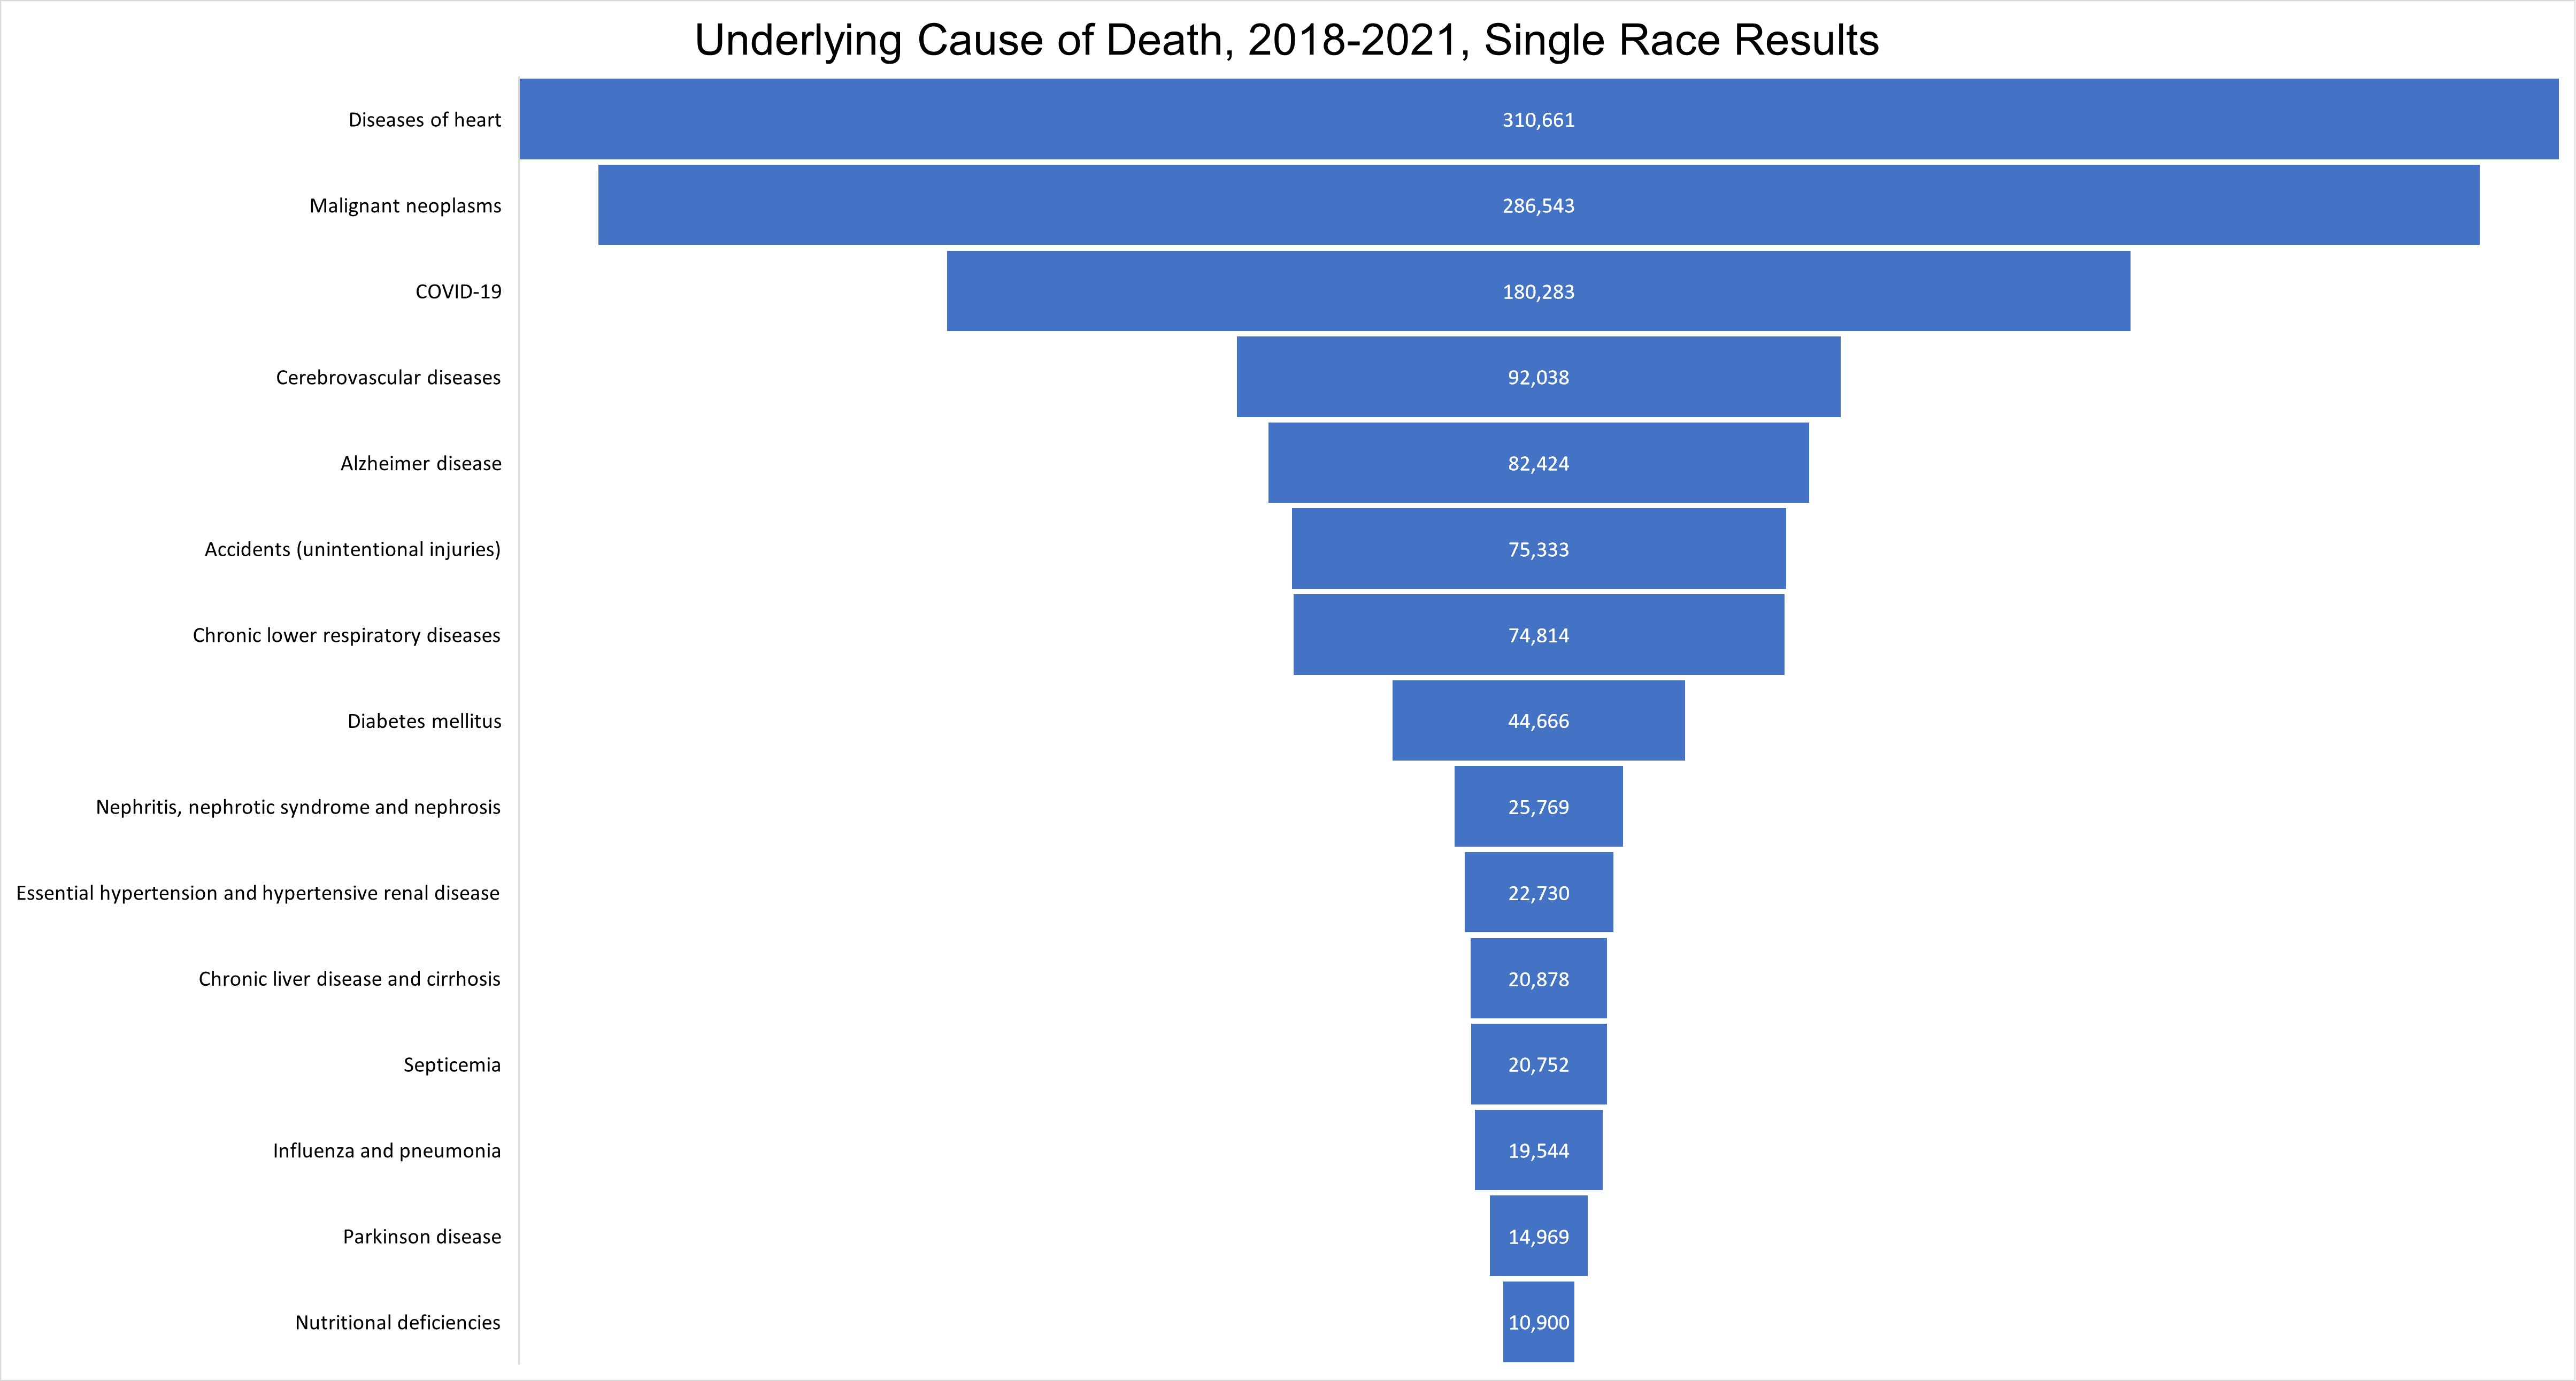

In [5]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "../input/underlying-cause-of-death-2018-2021/Underlying Cause of Death.jpg", width = 900, height = 900)


<i>
Centers for Disease Control and Prevention, National Center for Health Statistics. National Vital Statistics System, Mortality 2018-2021 on CDC WONDER Online Database, released in 2021. Data are from the Multiple Cause of Death Files, 2018-2021, as compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. Accessed at http://wonder.cdc.gov/ucd-icd10-expanded.html on Feb 24, 2023 4:53:43 PM
</i>

<h5><b>Regarding the 15 leading causes of women's death, many illnesses and signs can be monitored by a smart device.</b>


<a id="2"></a> <br>
# Section 2. FitBit Fitness Tracker Data

<h4><b>To analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices, I firstly used the <font color='orange'>"FitBit Fitness Tracker Data"</font> on kaggle.</b>

<i><font color='blue'>Tools: Microsoft Excel (data cleaning and data viz), SQL, R</font></i>

<b>Now let's see the results of usage by different functions:</b>



<a id="2.1"></a> <br>
# 2.1. Daily Activities

<b>Data Cleaning and Reports:</b>

1. When I first opened up `dailyActivity_merged`, I found out there were 33 people recorded in this CSV file, instead of 30 that showed in the original data page.
1. The record days are between 4/16/2016 and 5/12/2016 (total 31 days by using R: <i>difftime("2016-5-12", "2016-4-16", units = "days")</i>)
1. After using sort and filter, I found out there were some missing data
1. There are other 3 CSV files showing daily activities: `dailyCalories_merged`, `dailyIntensities_merged`, `dailySteps_merged`. After using <i>Pivot Table</i>, I found out all the information of these 3 CSV files are already written into the `dailyActivity_merged`.
1. After used "conditional format" function in Excel, I confirmed there were no duplicated and null data

In [6]:
daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [7]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

Above shows the columns as different functions of the records.

In [8]:
daily_activity_usage = pd.read_csv('../input/fitbit-usages/Fitbit_dailyactivity_usage.csv')

In [9]:
daily_activity_usage.head(15)

Id  April   May  Total
0   1503960366     19  12.0     31
1   1624580081     19  12.0     31
2   1644430081     19  11.0     30
3   1844505072     19  12.0     31
4   1927972279     19  12.0     31
5   2022484408     19  12.0     31
6   2026352035     19  12.0     31
7   2320127002     19  12.0     31
8   2347167796     18   NaN     18
9   2873212765     19  12.0     31
10  3372868164     19   1.0     20
11  3977333714     19  11.0     30
12  4020332650     19  12.0     31
13  4057192912      4   NaN      4
14  4319703577     19  12.0     31

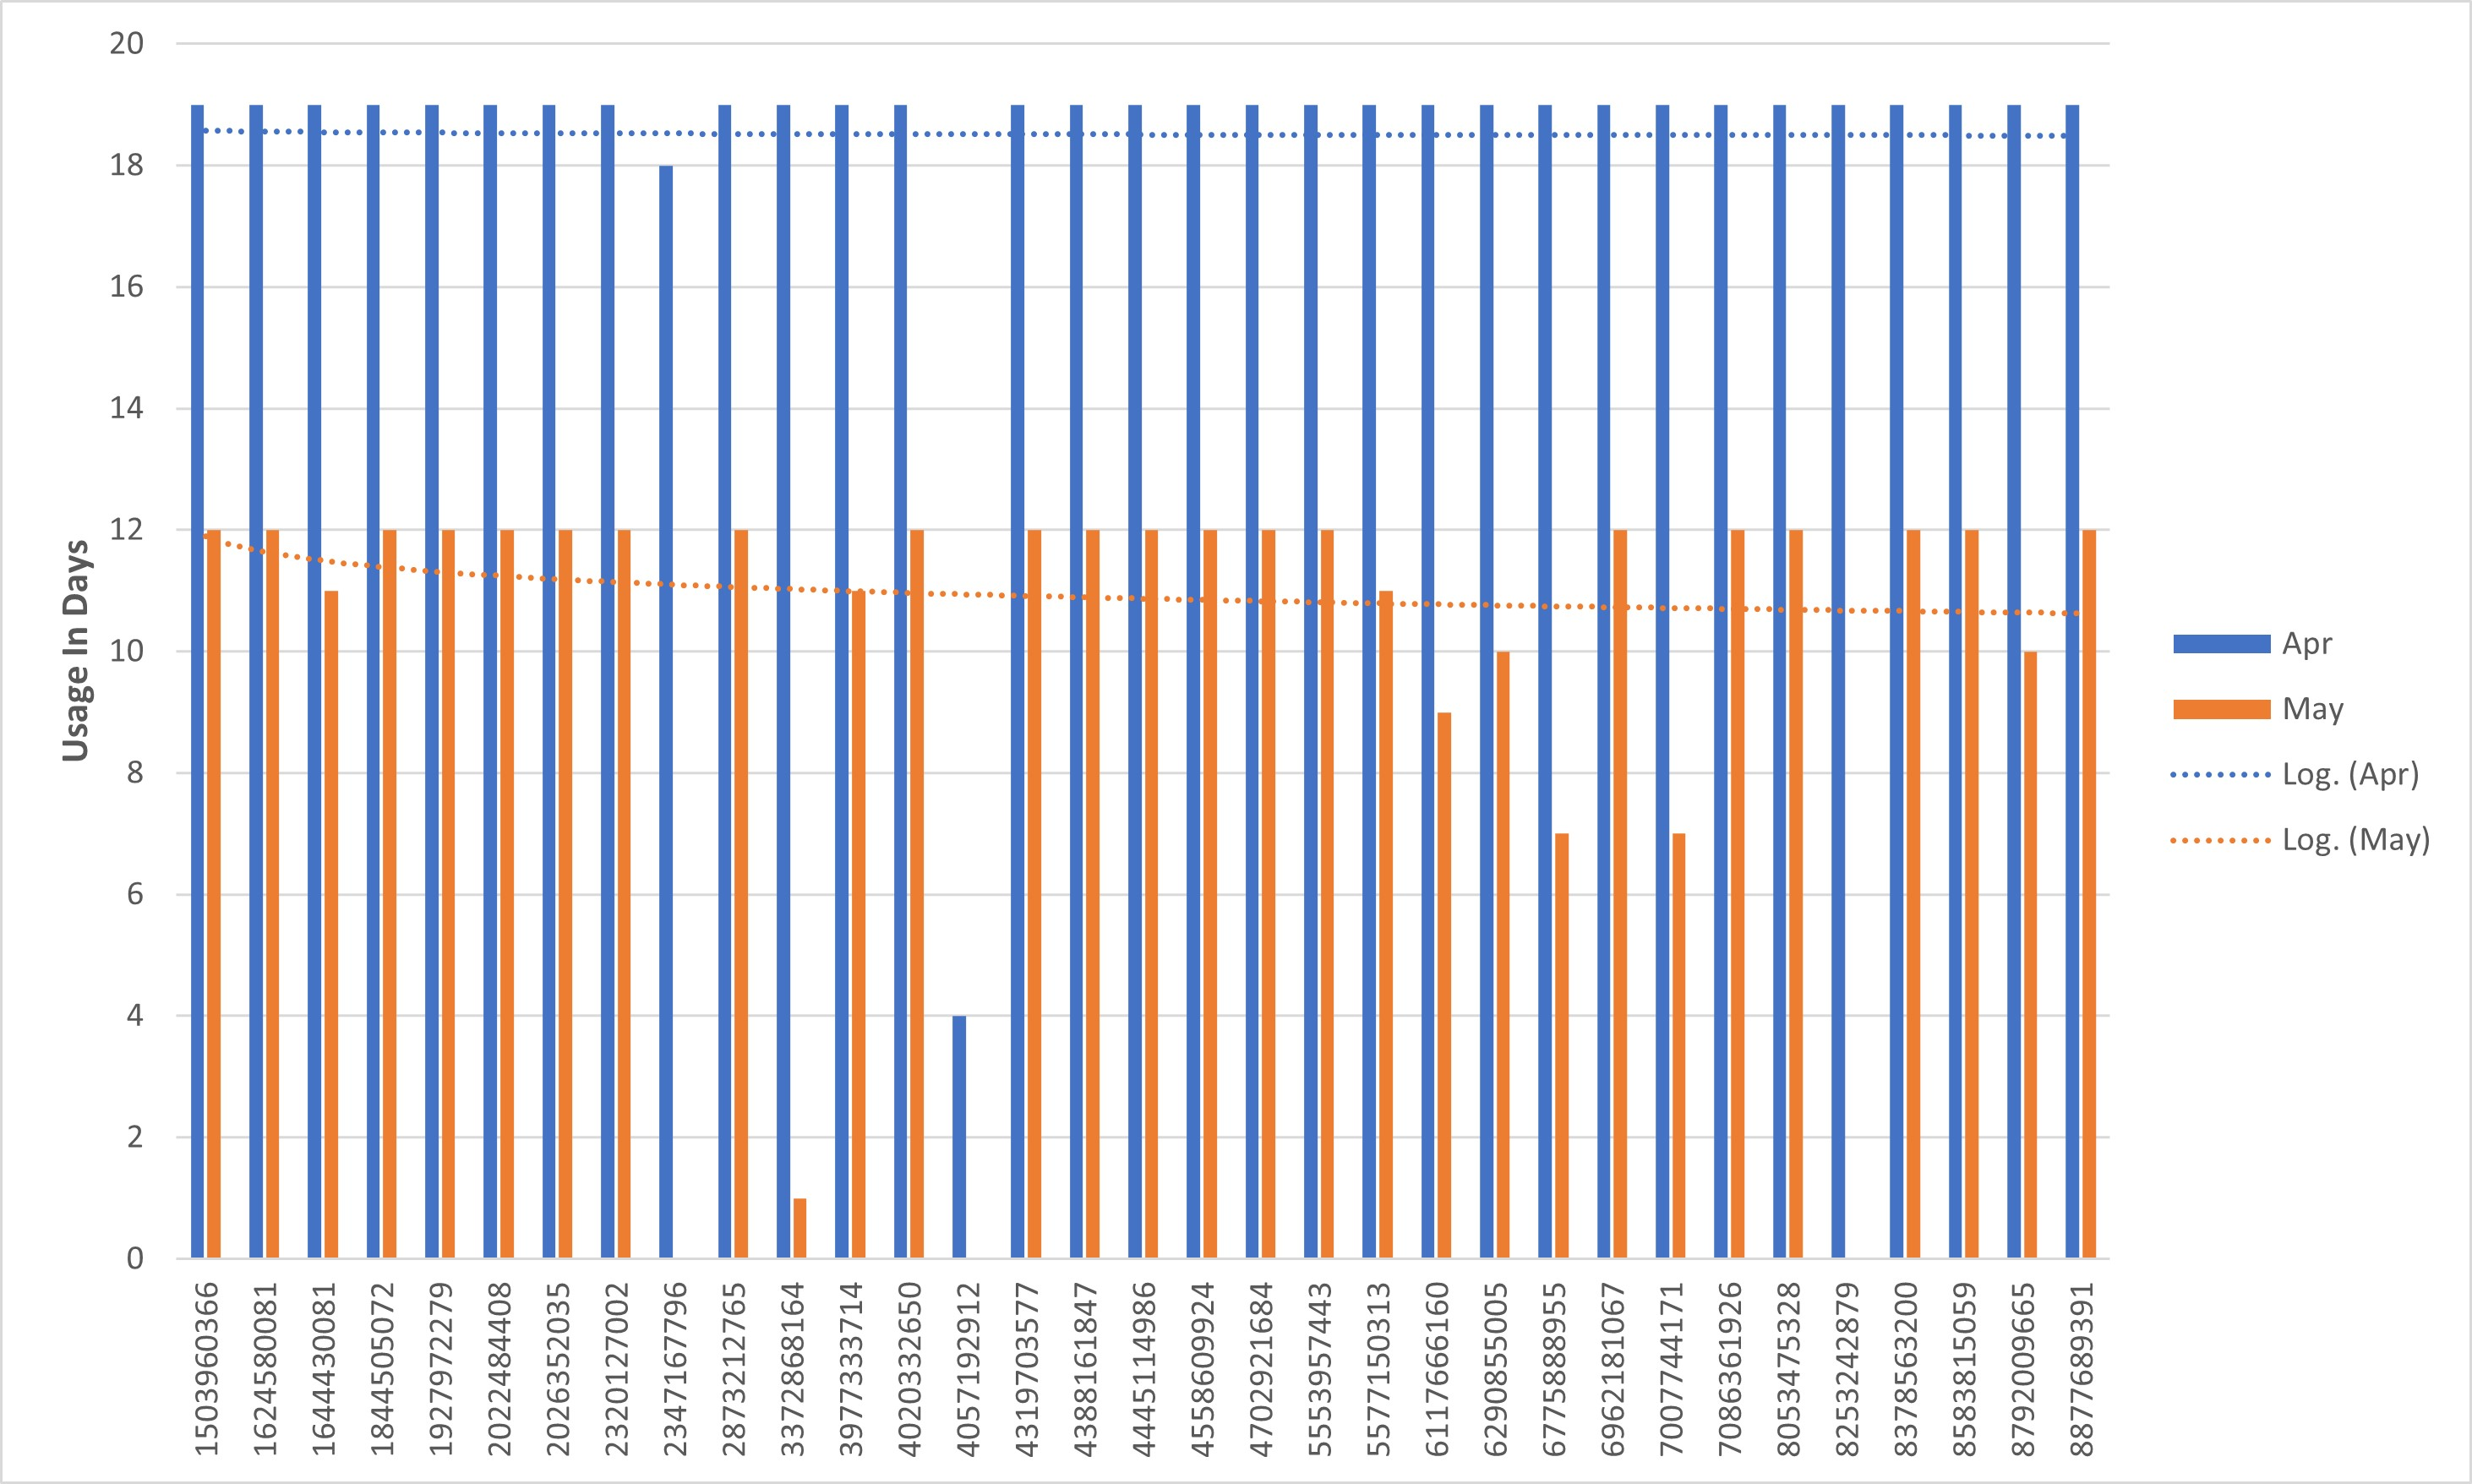

In [10]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "../input/fitbit-usages-charts/daily usage.jpg", width = 500, height = 500)

The bar chart above shows the comparison between each user on each day. We can easily tell some of the users don't have all 30 days of the records.

<a id="2.2"></a> <br>
# 2.2. Hourly Activities


<b>Data Cleaning and Reports:</b>

1. Hourly activities included 3 CSV files: `hourlyCalories_merged`, `hourlyIntensities_merged`, `hourlySteps_merged`
1. In order to handle the big data, I used MySQL instead of Excel after importing this dataset into MySQL.
1. I used syntax <i>SELECT DISTINCT Id, FROM`hourlyCalories_merged`</i> and made sure all 33 users had the records in this dataset.
1. Used <i>DISTINCT</i> syntax and return the total activity records, confirmed there were 22099 records of activities.
1. There was no null data
1. Used <i>SELECT COUNT(Id) FROM GROUP BY Id ASC</i> to return the record numbers for each user.
1. Used R to calculate the full total record should be 24288 (= 33 users * 31days * 24 hours), confirmed there were missing data, counted the usage by using math functions.


In order to challenge myself, I merged 3 hourly activity files into one using SQL syntax <i>INNER JOIN, ON</i>.



In [11]:
hourly_activity_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')

In [12]:
hourly_activity_calories.columns

Index(['Id', 'ActivityHour', 'Calories'], dtype='object')

* All hourly activity files are having the same columns by functions.

Used MySQL to return the record numbers for each users (table and chart below), it can be counted as the function usage

In [13]:
hourly_activity_usage = pd.read_csv('../input/fitbit-usages/Fitbit_hourlyactivity_usage.csv')

In [14]:
hourly_activity_usage.head(15)

Id  Calories Usage  Intensities Usage  Steps Usage
0   1503960366             717                717          717
1   1624580081             736                736          736
2   1644430081             708                708          708
3   1844505072             731                731          731
4   1927972279             736                736          736
5   2022484408             736                736          736
6   2026352035             736                736          736
7   2320127002             735                735          735
8   2347167796             414                414          414
9   2873212765             736                736          736
10  3372868164             472                472          472
11  3977333714             696                696          696
12  4020332650             732                732          732
13  4057192912              88                 88           88
14  4319703577             724                724          724

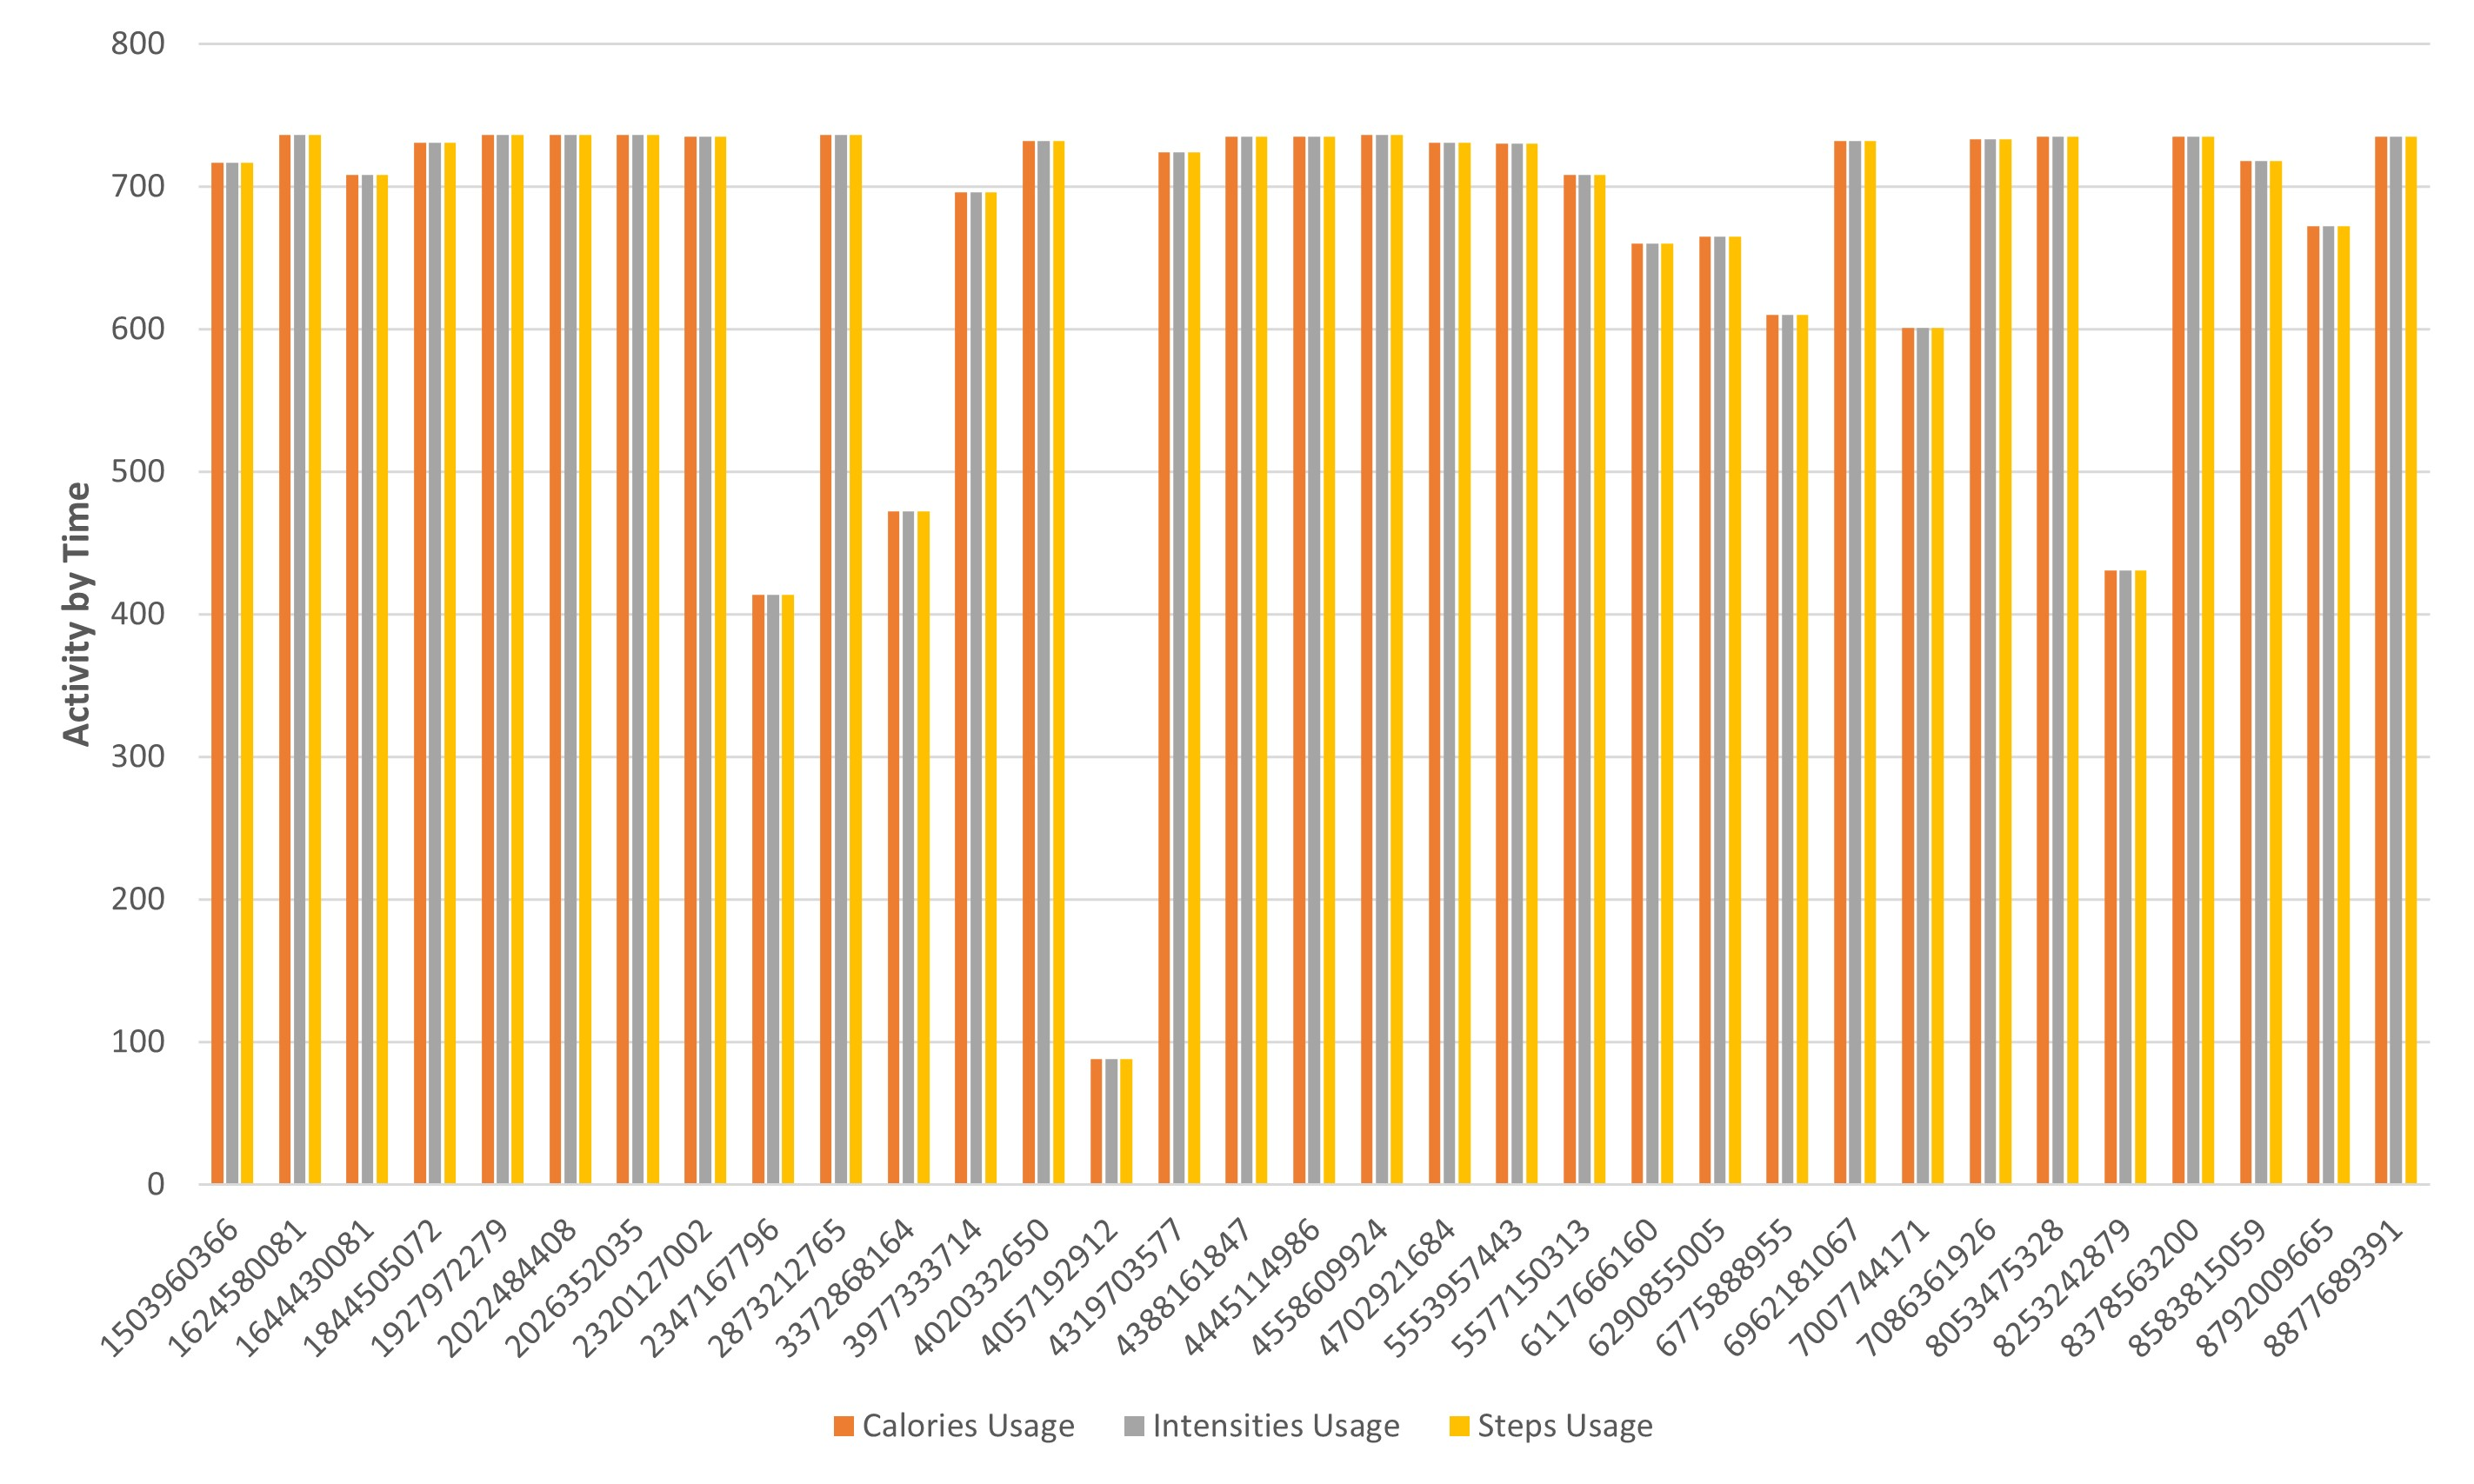

In [15]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "../input/fitbit-usages-charts/houly usage.jpg", width = 500, height = 500)

<a id="2.3"></a> <br>
# 2.3. Heartrate by Seconds



<b>Data Cleaning and Reports:</b>

1. The csv file `heartrate_seconds_merged` contains 1048575 rows of data. I decided to analyse the data using BigQuery.
1. After using syntax <i>SELECT DISTINCT Id, COUNT (Time), FROM`heartrate_seconds_merged`, GROUP BY Id </i>, I confirmed there were only 7 users who had records in this data file. 
1. There were no null data.
1. Counted usage using R.

In [16]:
heartrate_seconds = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')

<i>Due to the size of this file, the process of running the column info (Id, Time, Value) is skipped.</i>

In [17]:
heartrate_seconds_usage = pd.read_csv('../input/fitbit-usages/FitBit_SecondHeartrate_Usage.csv')

In [18]:
heartrate_seconds_usage.head(15)

Id  Heartrate per Second Usage
0   1503960366                           0
1   1624580081                           0
2   1644430081                           0
3   1844505072                           0
4   1927972279                           0
5   2022484408                      154104
6   2026352035                        2490
7   2320127002                           0
8   2347167796                      152683
9   2873212765                           0
10  3372868164                           0
11  3977333714                           0
12  4020332650                      285461
13  4057192912                           0
14  4319703577                           0

This is the graphic that overview of the usages of the heartrate second function:

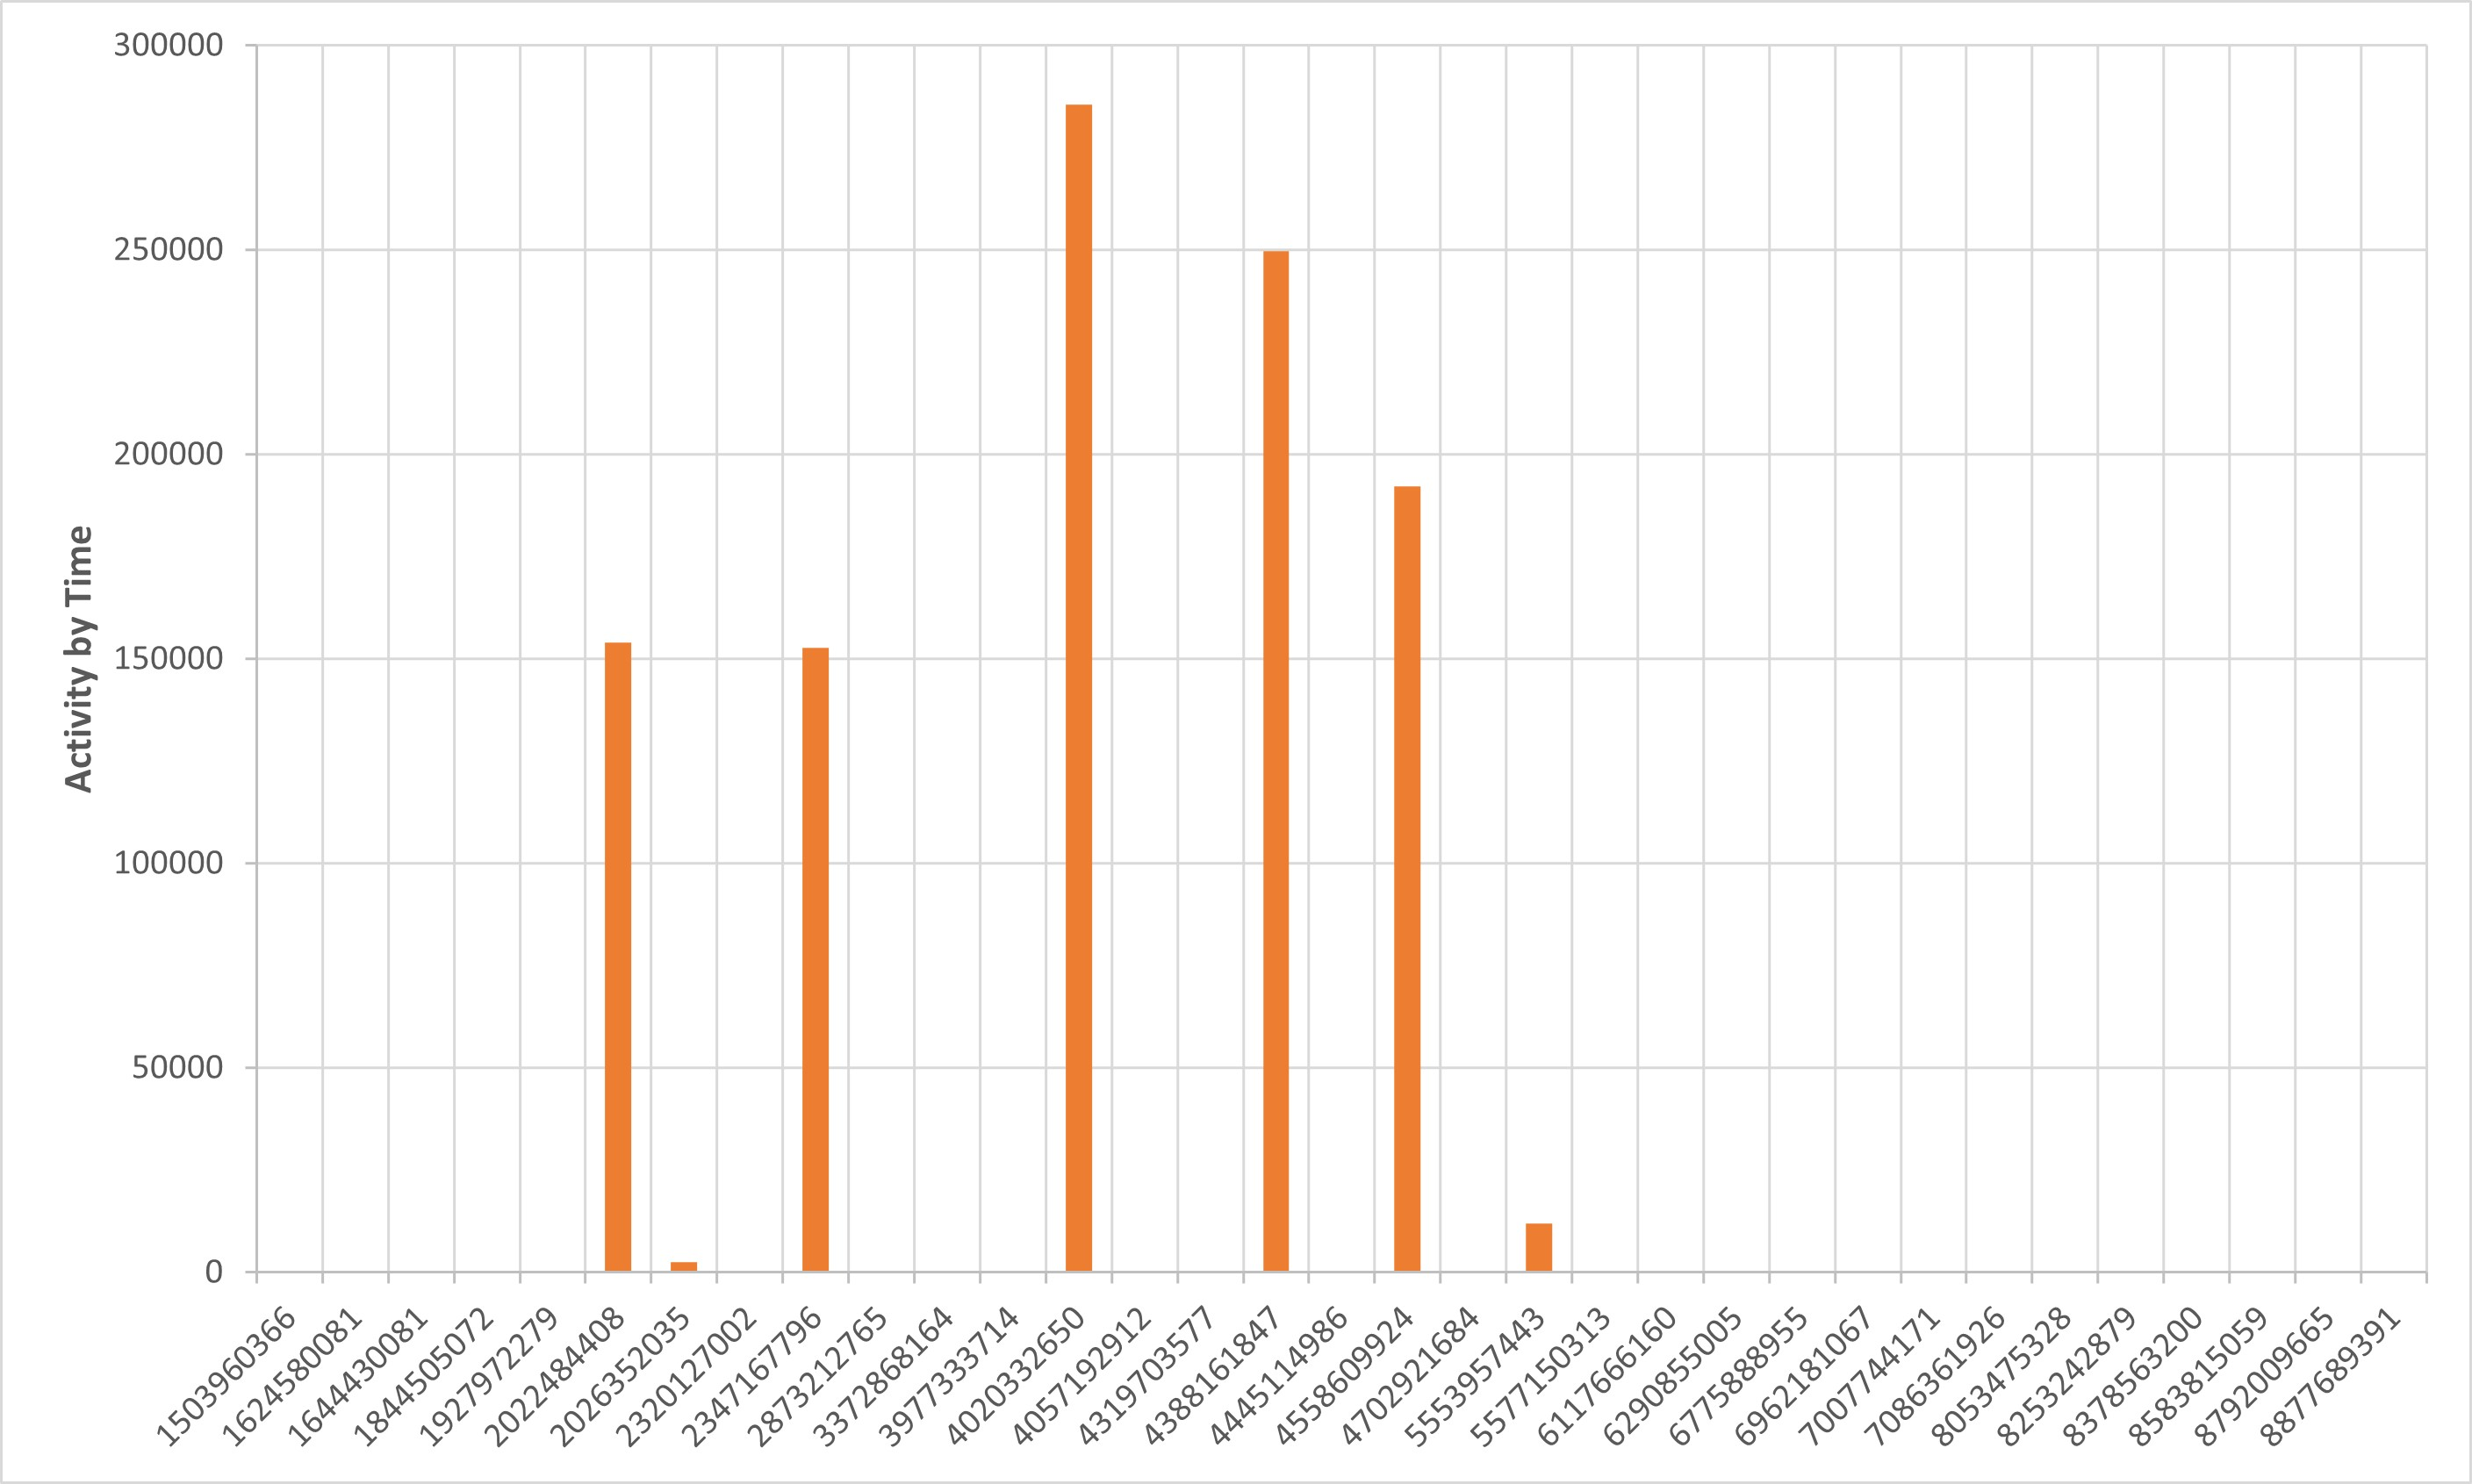

In [19]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "../input/fitbit-usages-charts/heartrate persecond usage.jpg", width = 500, height = 500)

<a id="2.4"></a> <br>
# 2.4. Minute Activity

The minute Activities contains four functions: Calories, Intensities, METs and Steps. With two versions: narrow and wide.

a. Minute Activities in Narrow (Calories, Intensities, METs and Steps)

<b>Data Cleaning and Reports: </b>

1. Cleaned and analyzed csv file `minuteCaloriesNarrow_merged` using BigQuery.
1. USED <i>SELECT COUNT (Id) FROM`minuteCaloriesNarrow_merged` WHERE Id, GROUP BY Id</i> to count row numbers for different users together
1. There were 1048575 data, total 27 users.
1. Continued to use the same tool and same way to analyse `minuteIntensitiesNarrow_merged`, `minuteMETsNarrow_merged`, `minuteStepsNarrow_merged`.
1. Confirmed all `Narrow` files have the same usages.
1. No Null data


* Will use minuteCaloriesNarrow_merged as an example to analyse all "narrow" files

In [20]:
minute_calories_narrow = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')

In [21]:
minute_calories_narrow.columns

Index(['Id', 'ActivityMinute', 'Calories'], dtype='object')

In [22]:
minute_usage_narrow = pd.read_csv('../input/fitbit-usages/Fitbit_minuteactivity_narrow_usage.csv')

In [23]:
minute_usage_narrow.head(15)

Id  Calories Count  Intensities Count  MET Count  Steps Count
0   1503960366           43020              43020      43020        43020
1   1624580081           44160              44160      44160        44160
2   1644430081           42480              42480      42480        42480
3   1844505072           43860              43860      43860        43860
4   1927972279           44160              44160      44160        44160
5   2022484408           44100              44100      44100        44100
6   2026352035           44160              44160      44160        44160
7   2320127002           44100              44100      44100        44100
8   2347167796           24840              24840      24840        24840
9   2873212765           44160              44160      44160        44160
10  3372868164           28320              28320      28320        28320
11  3977333714           41760              41760      41760        41760
12  4020332650           43920              43920      43920        43920
13  4057192912            5280               5280       5280         5280
14  4319703577           43440              43440      43440        43440

Below is the graph that shows the usage for all "narrow" functions. We realized there were 6 users who didn't have any record in this function.

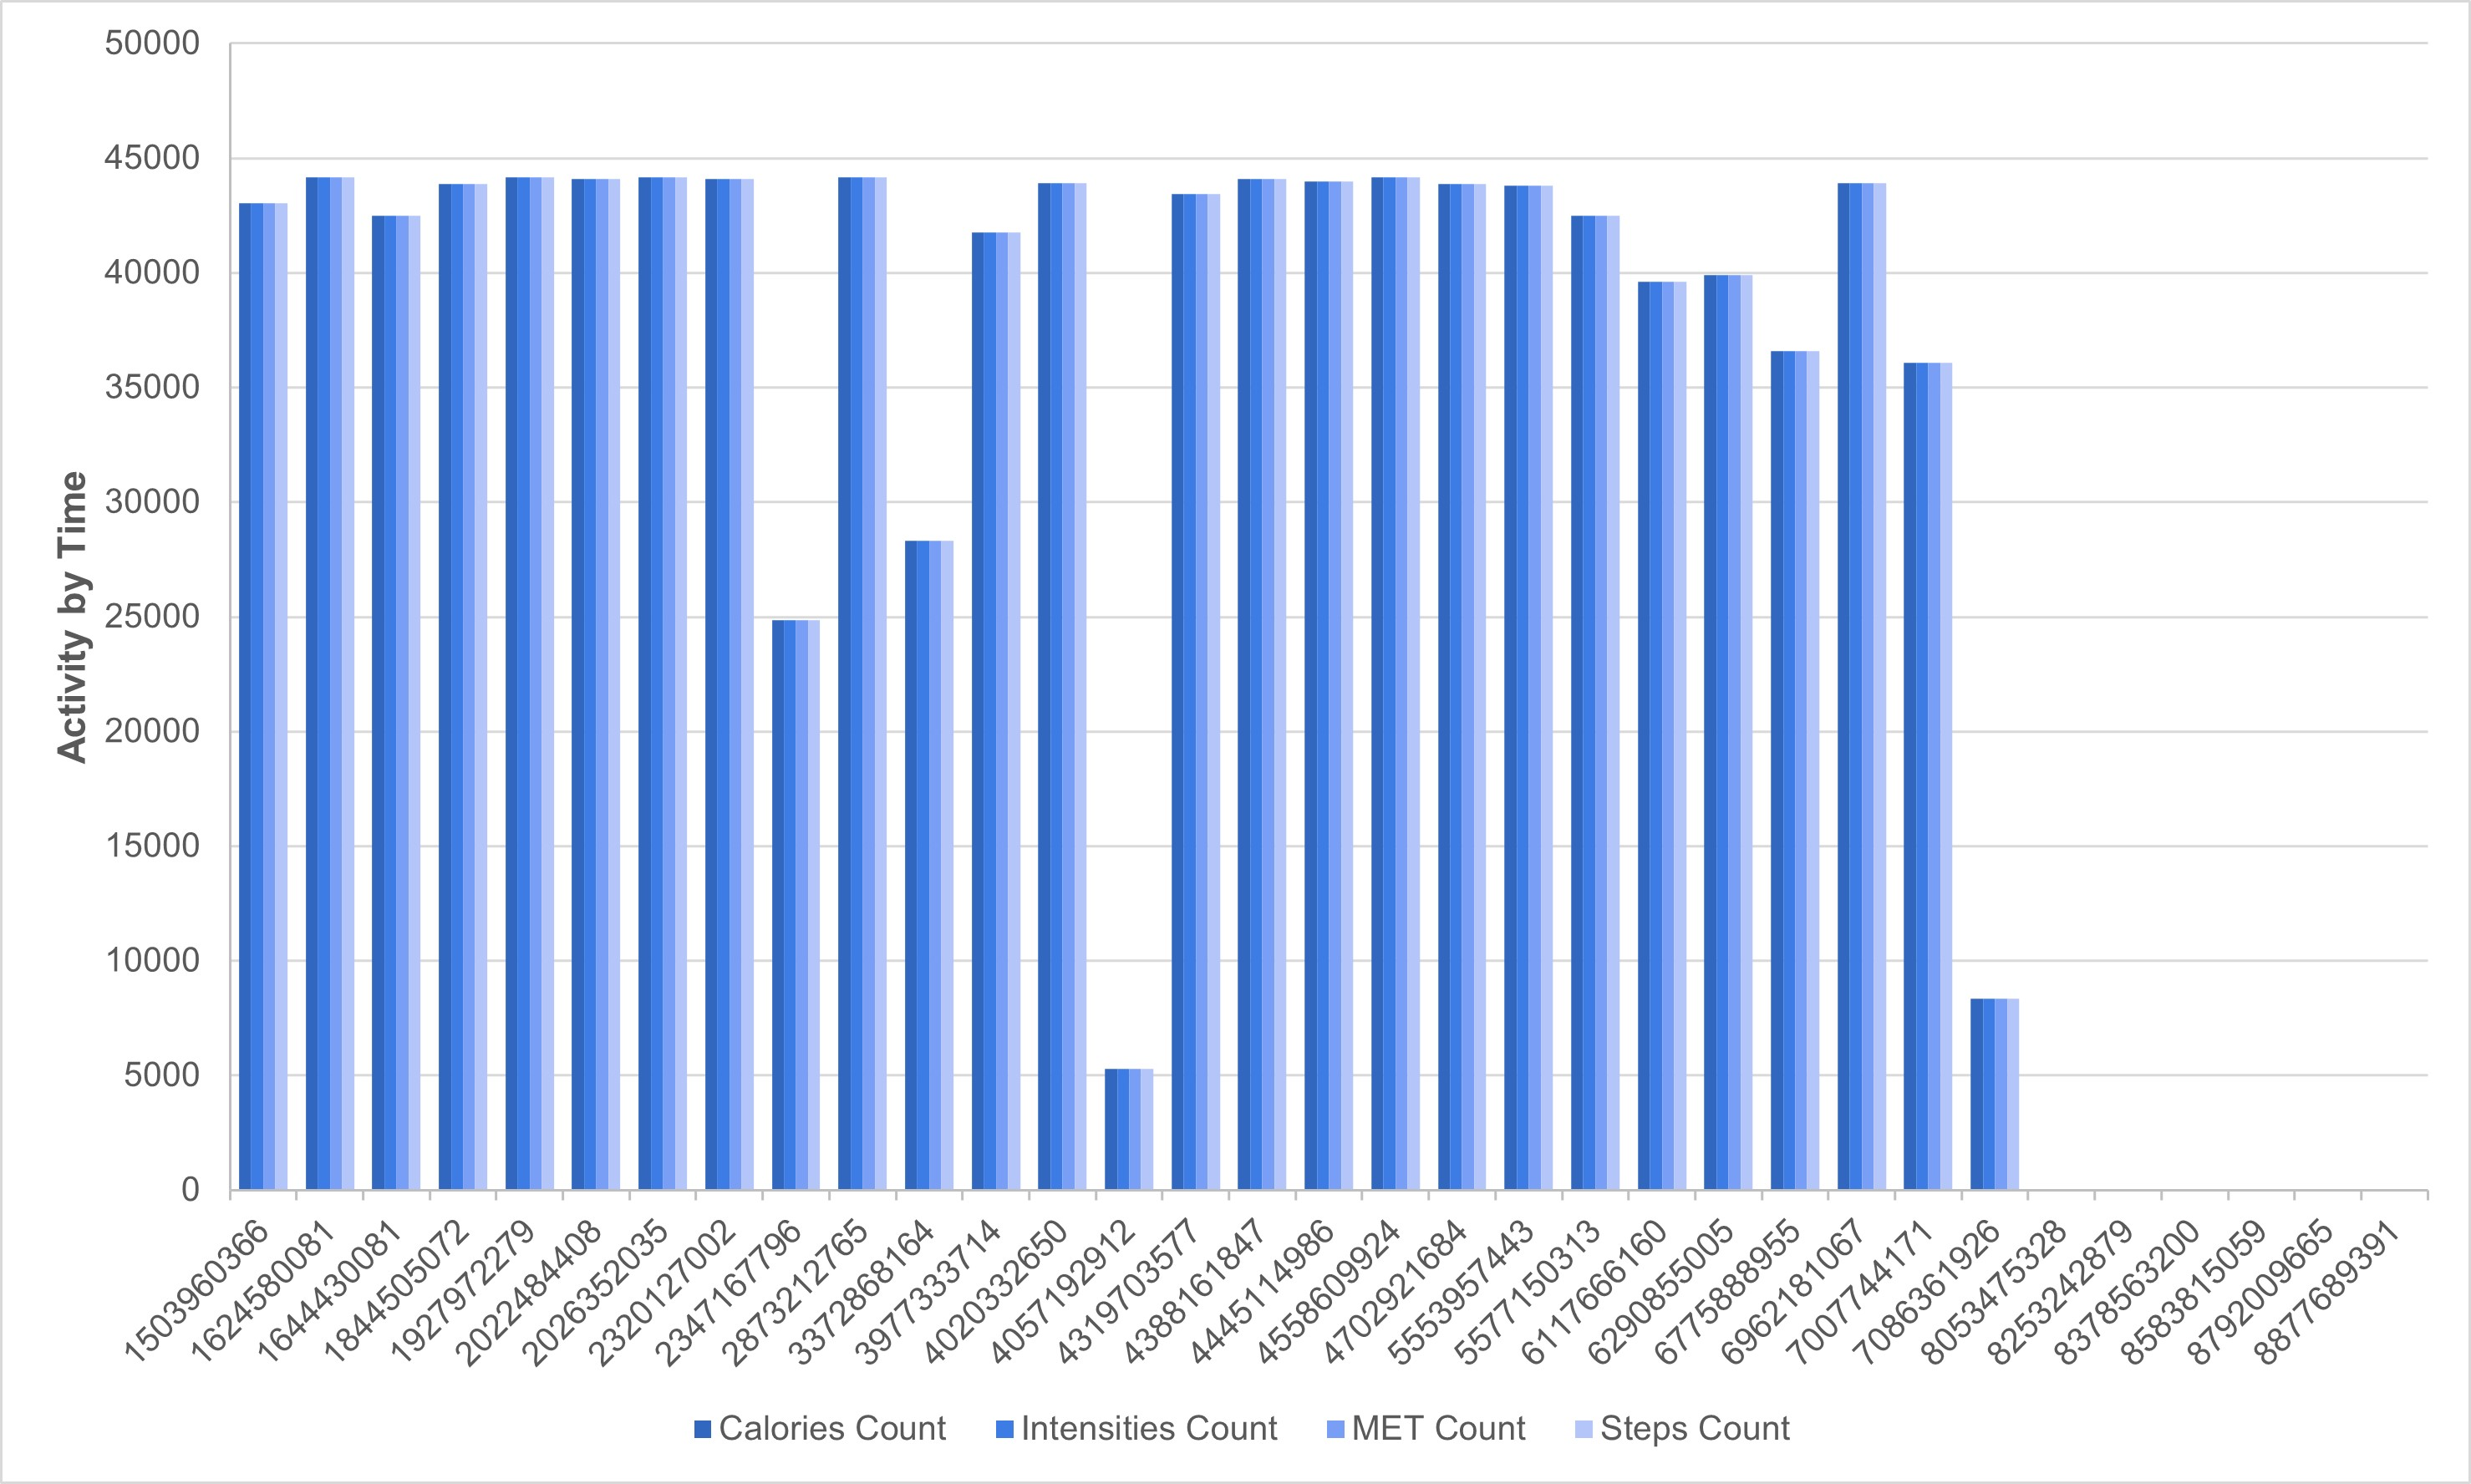

In [24]:
#minute usage narrow
from IPython.display import Image
Image(filename = "../input/fitbit-usages-charts/minute usage narrow.jpg", width = 500, height = 500)

b. Minute Activities in Wide (Calories, Intensities and Steps)

<b>Data Cleaning and Reports:</b>

1. Cleaned and analyzed csv file `minuteCaloriesWide_merged` using BigQuery.
1. USED SELECT COUNT (Id) FROM.. WHERE Id, GROUP BY Id to count row numbers for different users together
1. There were 21645 data, total 33 users.
1. There was a major error in this dataset - the report dates were between 4/13/2016 and 5/13/2016 which was different from 4/12/2016 - 5/12/2016.
 1. syntax used: <i>SELECT DISTINCT ActivityHour FROM `minuteCaloriesWide_merged` ORDER BY ActivityHour ASC</i>
1. By using the same syntax as below, I realized this dataset was counted by hours instead of minutes.
1. Realized there were columns named `Calories##`, what did Calories## mean?
1. Continued to use the same tool and same way to analyse `minuteIntensitiesWide_merged` and `minuteStepsWide_merged`.
1. Confirmed all `Wide` files have the same usages.
1. No Null data

In [25]:
minute_calories_wide = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv')

In [26]:
minute_calories_wide.columns

Index(['Id', 'ActivityHour', 'Calories00', 'Calories01', 'Calories02',
       'Calories03', 'Calories04', 'Calories05', 'Calories06', 'Calories07',
       'Calories08', 'Calories09', 'Calories10', 'Calories11', 'Calories12',
       'Calories13', 'Calories14', 'Calories15', 'Calories16', 'Calories17',
       'Calories18', 'Calories19', 'Calories20', 'Calories21', 'Calories22',
       'Calories23', 'Calories24', 'Calories25', 'Calories26', 'Calories27',
       'Calories28', 'Calories29', 'Calories30', 'Calories31', 'Calories32',
       'Calories33', 'Calories34', 'Calories35', 'Calories36', 'Calories37',
       'Calories38', 'Calories39', 'Calories40', 'Calories41', 'Calories42',
       'Calories43', 'Calories44', 'Calories45', 'Calories46', 'Calories47',
       'Calories48', 'Calories49', 'Calories50', 'Calories51', 'Calories52',
       'Calories53', 'Calories54', 'Calories55', 'Calories56', 'Calories57',
       'Calories58', 'Calories59'],
      dtype='object')

* You can see the column info as I mentioned in data cleaning reports

In [27]:
minute_usage_wide = pd.read_csv('../input/fitbit-usages/Fitbit_minuteactivity_wide_usage.csv')

In [28]:
minute_usage_wide.head(15)

Id  Calories Count  Intensities Count  Steps Count
0   1503960366             719                719          719
1   1624580081             729                729          729
2   1644430081             684                684          684
3   1844505072             724                724          724
4   1927972279             729                729          729
5   2022484408             729                729          729
6   2026352035             729                729          729
7   2320127002             729                729          729
8   2347167796             390                390          390
9   2873212765             725                725          725
10  3372868164             448                448          448
11  3977333714             725                725          725
12  4020332650             726                726          726
13  4057192912              64                 64           64
14  4319703577             700                700          700

Below are the graphic that shows the usage of this function

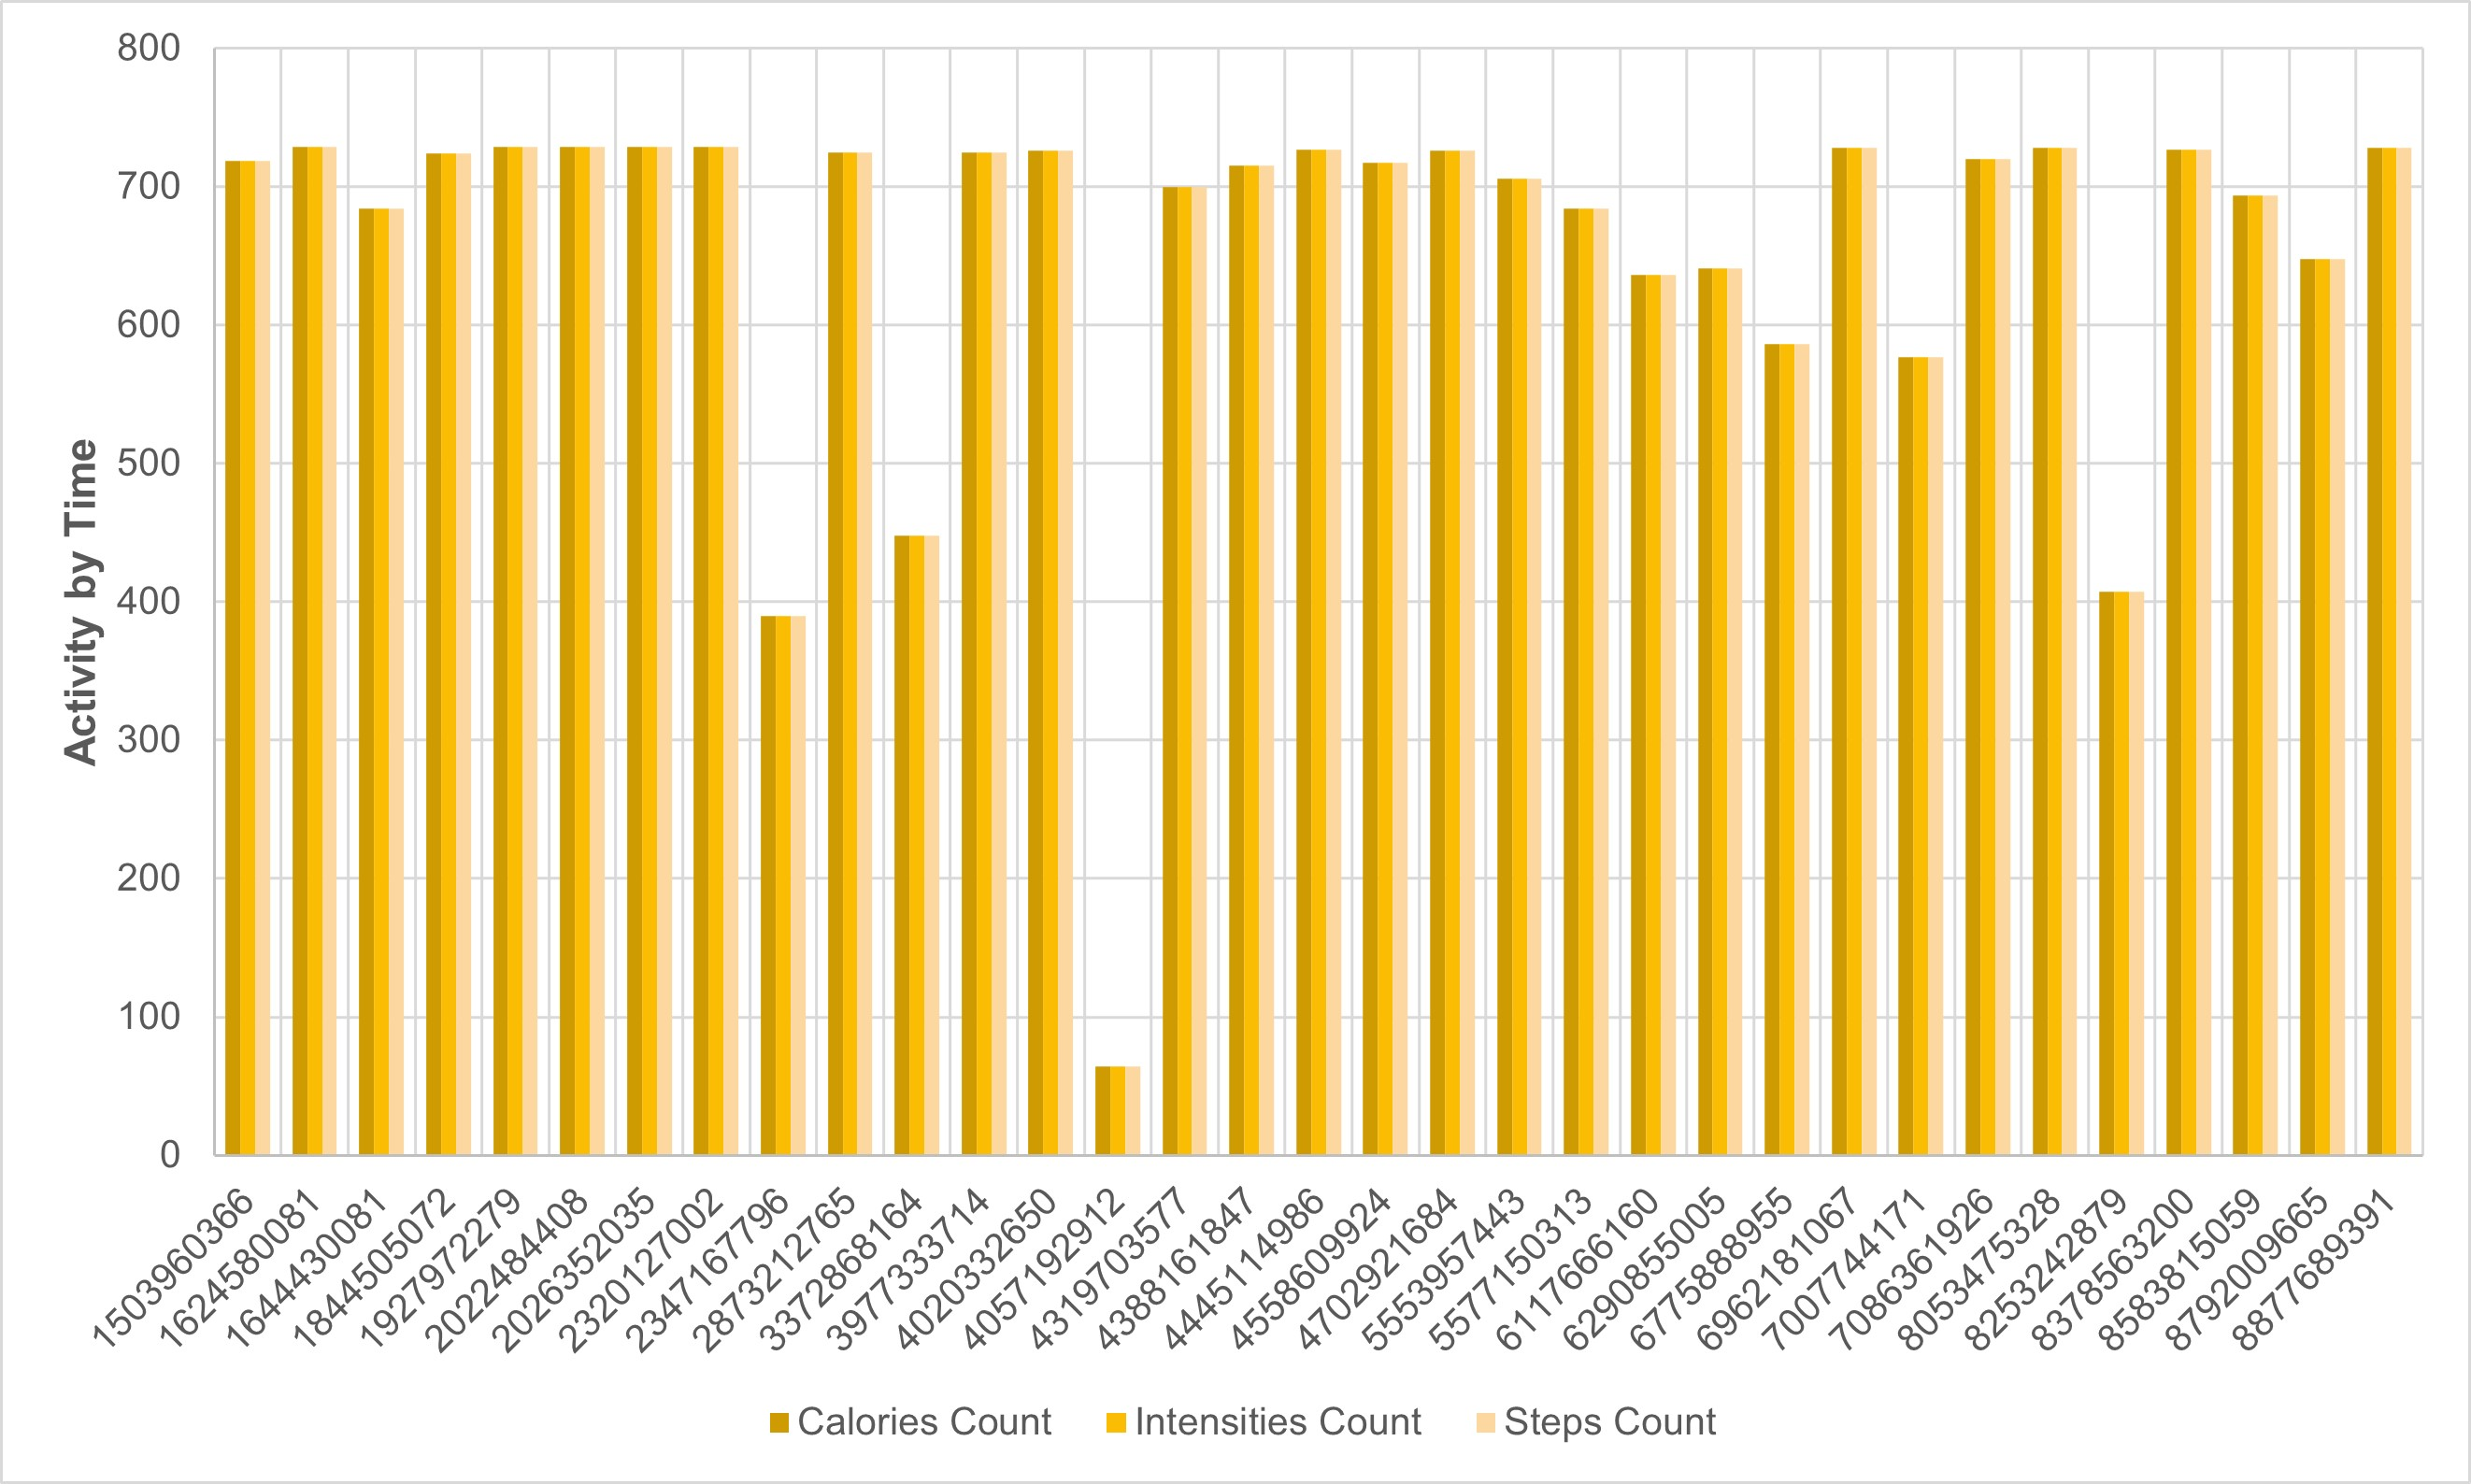

In [29]:
#minute usage wide
from IPython.display import Image
Image(filename = "../input/fitbit-usages-charts/minute usage wide.jpg", width = 500, height = 500)

<a id="2.5"></a> <br>
# 2.5. Minute Sleep


<b>Data Cleaning and Reports:</b>

1. Cleaned and analyzed csv file `minuteSleep_merged' using MySQL.
1. By using syntax <i>SELECT Id, date FROM `minuteSleep_merged` GROUP BY Id</i>, confirmed the data was counted in minutes.
1. There were 24 users used this function to track sleep in minute    
1. There were a new column named "logid". Confirmed there were 459 logids after used syntax <i>SELECT DISTINCT logID FROM `minuteSleep_merged`</i>
    


In [30]:
minute_sleep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')

In [31]:
minute_sleep.columns

Index(['Id', 'date', 'value', 'logId'], dtype='object')

In [32]:
minute_sleep_usage = pd.read_csv('../input/fitbit-usages/Fitbit_minutesleep_usage_logged.csv')

In [33]:
minute_sleep_usage.head(15)

Id  Activity Count
0   1503960366            9580
1   1624580081               0
2   1644430081            1384
3   1844505072            2883
4   1927972279            2189
5   2022484408               0
6   2026352035           15054
7   2320127002              69
8   2347167796            7370
9   2873212765               0
10  3372868164               0
11  3977333714           12912
12  4020332650            3038
13  4057192912               0
14  4319703577           13051

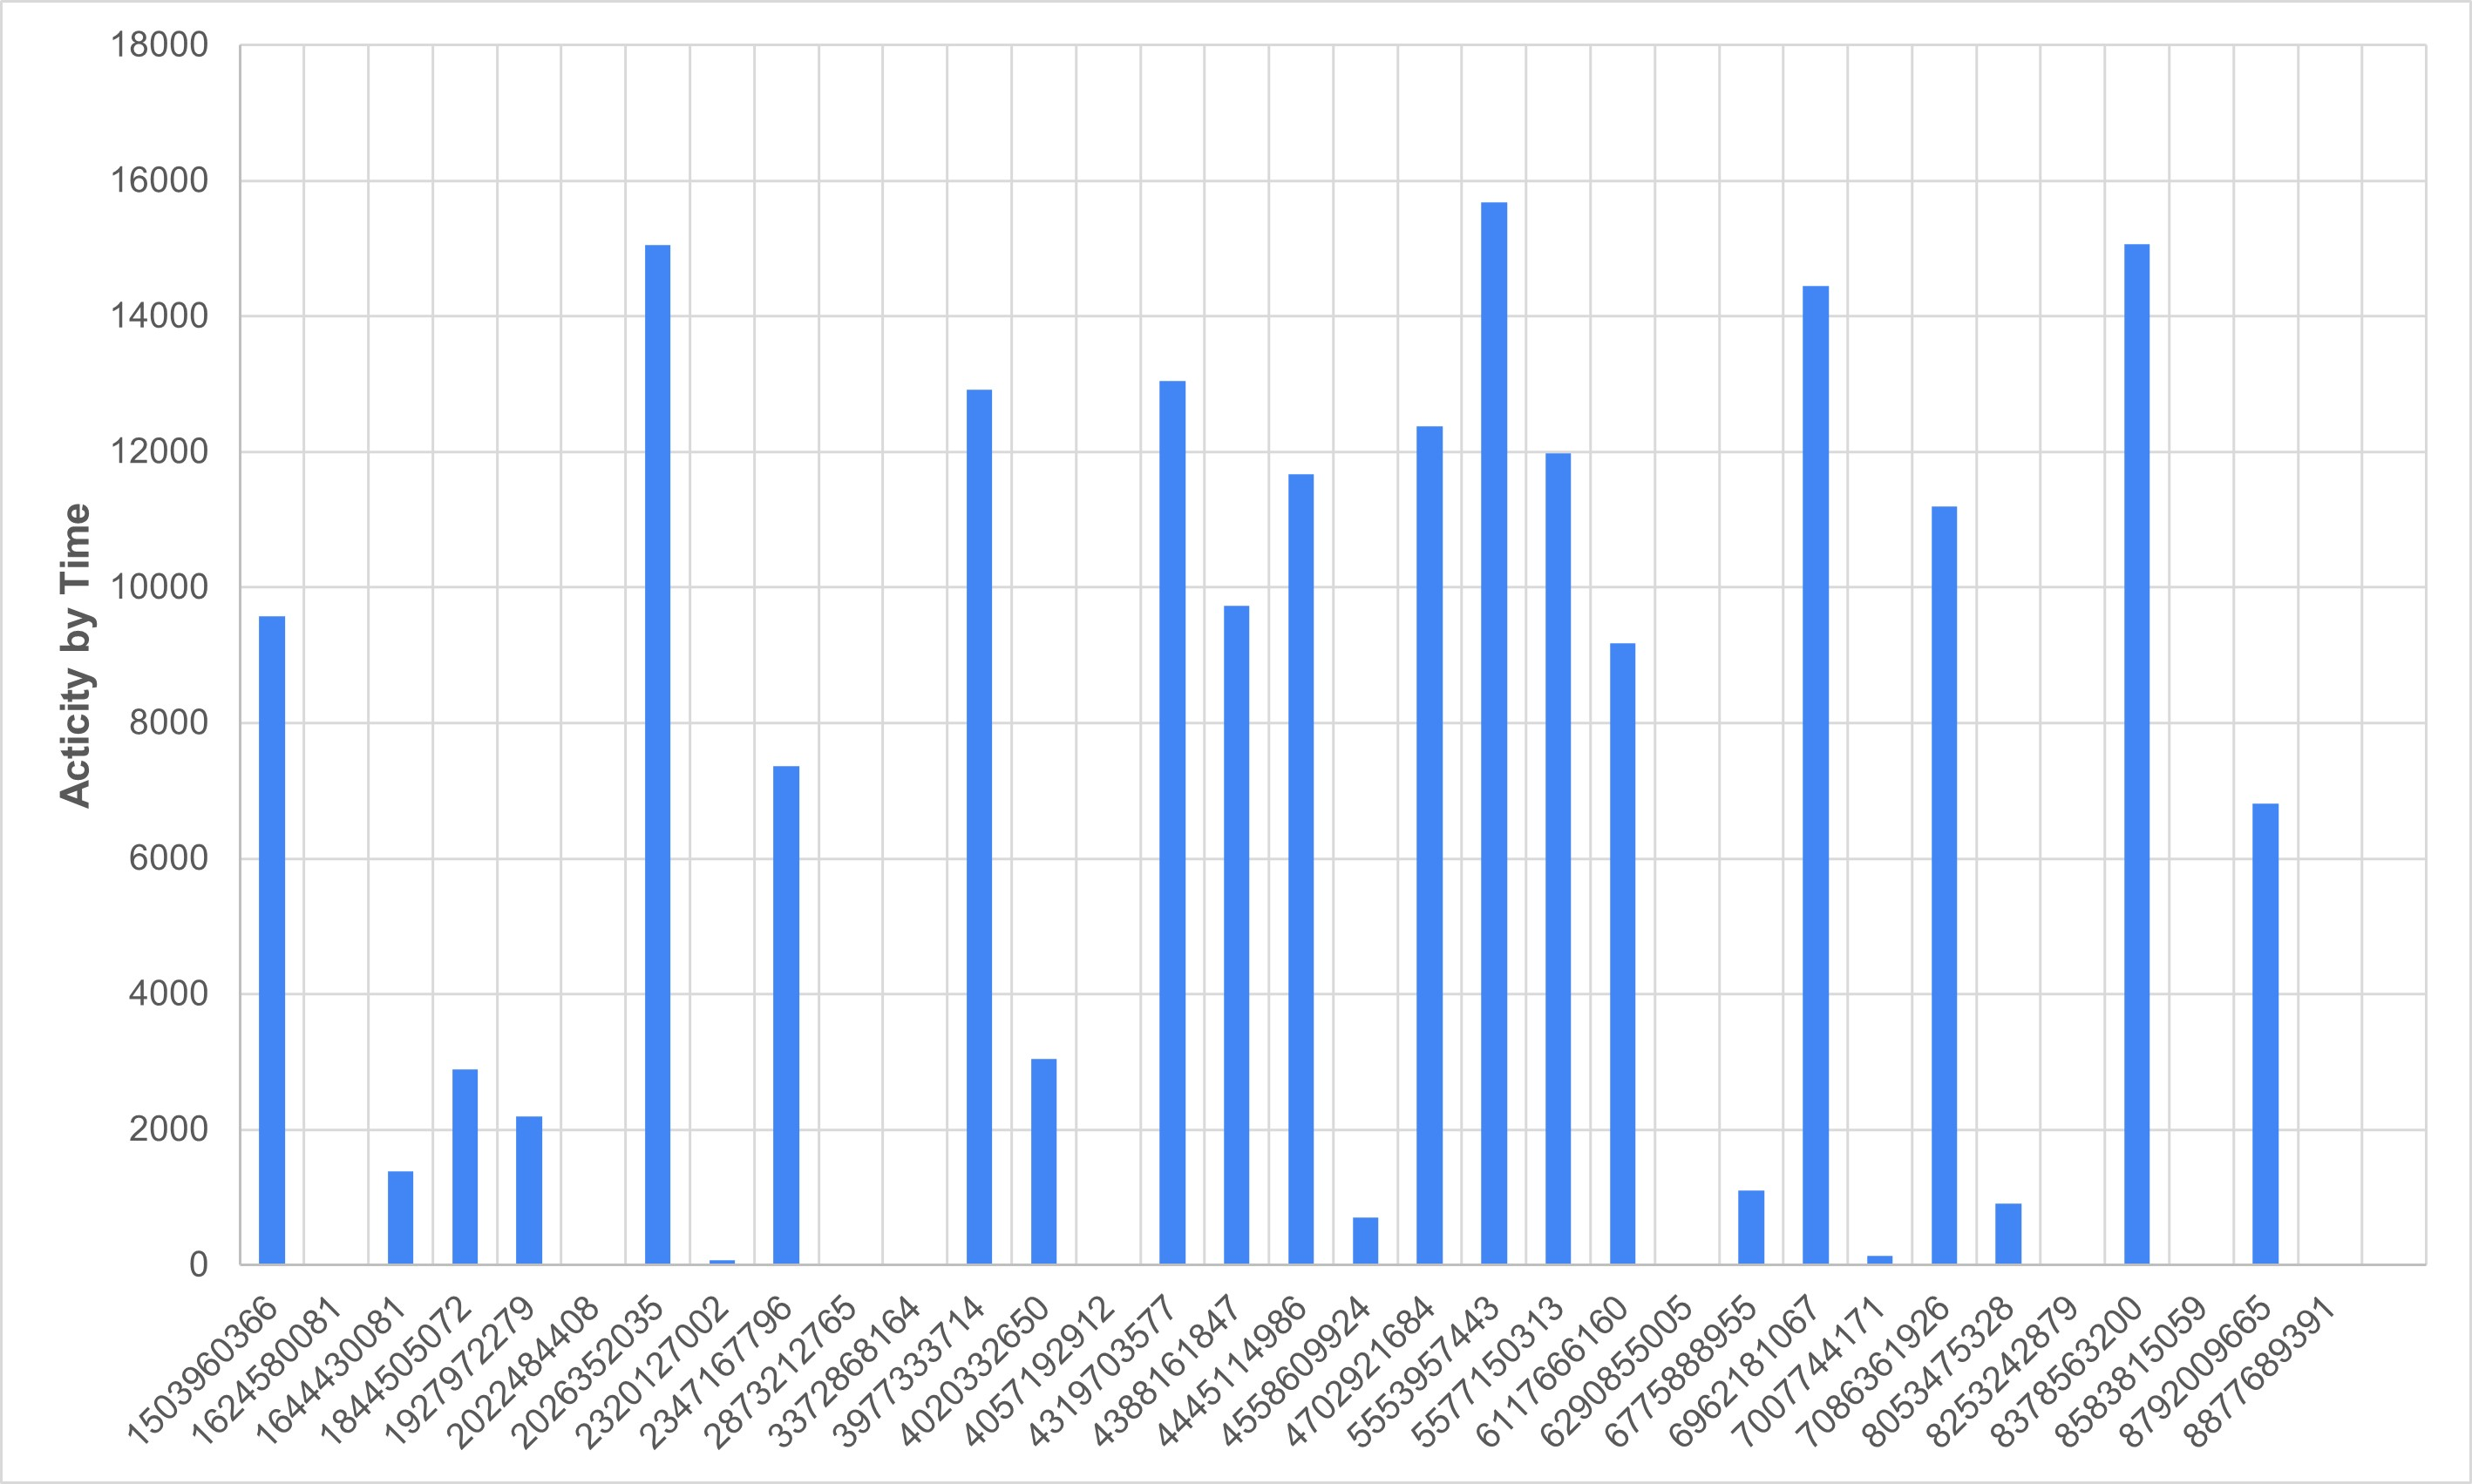

In [34]:
#minute sleep usage
from IPython.display import Image
Image(filename = "../input/fitbit-usages-charts/minute sleep usage.jpg", width = 500, height = 500)

<a id="2.6"></a> <br>
# 2.6. Sleep Day


<b>Data Cleaning and Reports:</b>

1. Clean and analyse `sleepDay_merged` using Microsoft Excel
1. (Optical) Added column name “TotalMinutesAwake” to count how long they stay awake after going to bed, it can monitor if they have sleeping issues. Used formula <i>=TotalTimeInBed-TotalMinutesAsleep</i>
1. Data was counted by day even it shows minutes and seconds
1. There were 24 users used this function to track sleep in day, it had the same usage from `minuteSleep_merged`

In [35]:
sleep_day = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [36]:
sleep_day.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [37]:
sleep_day_usage = pd.read_csv('../input/fitbit-usages/Fitbit_sleepday_Usage.csv')

In [38]:
sleep_day_usage.head(15)

Id  Activity_Count
0   1503960366              25
1   1624580081               0
2   1644430081               4
3   1844505072               3
4   1927972279               5
5   2022484408               0
6   2026352035              28
7   2320127002               1
8   2347167796              15
9   2873212765               0
10  3372868164               0
11  3977333714              28
12  4020332650               8
13  4057192912               0
14  4319703577              26

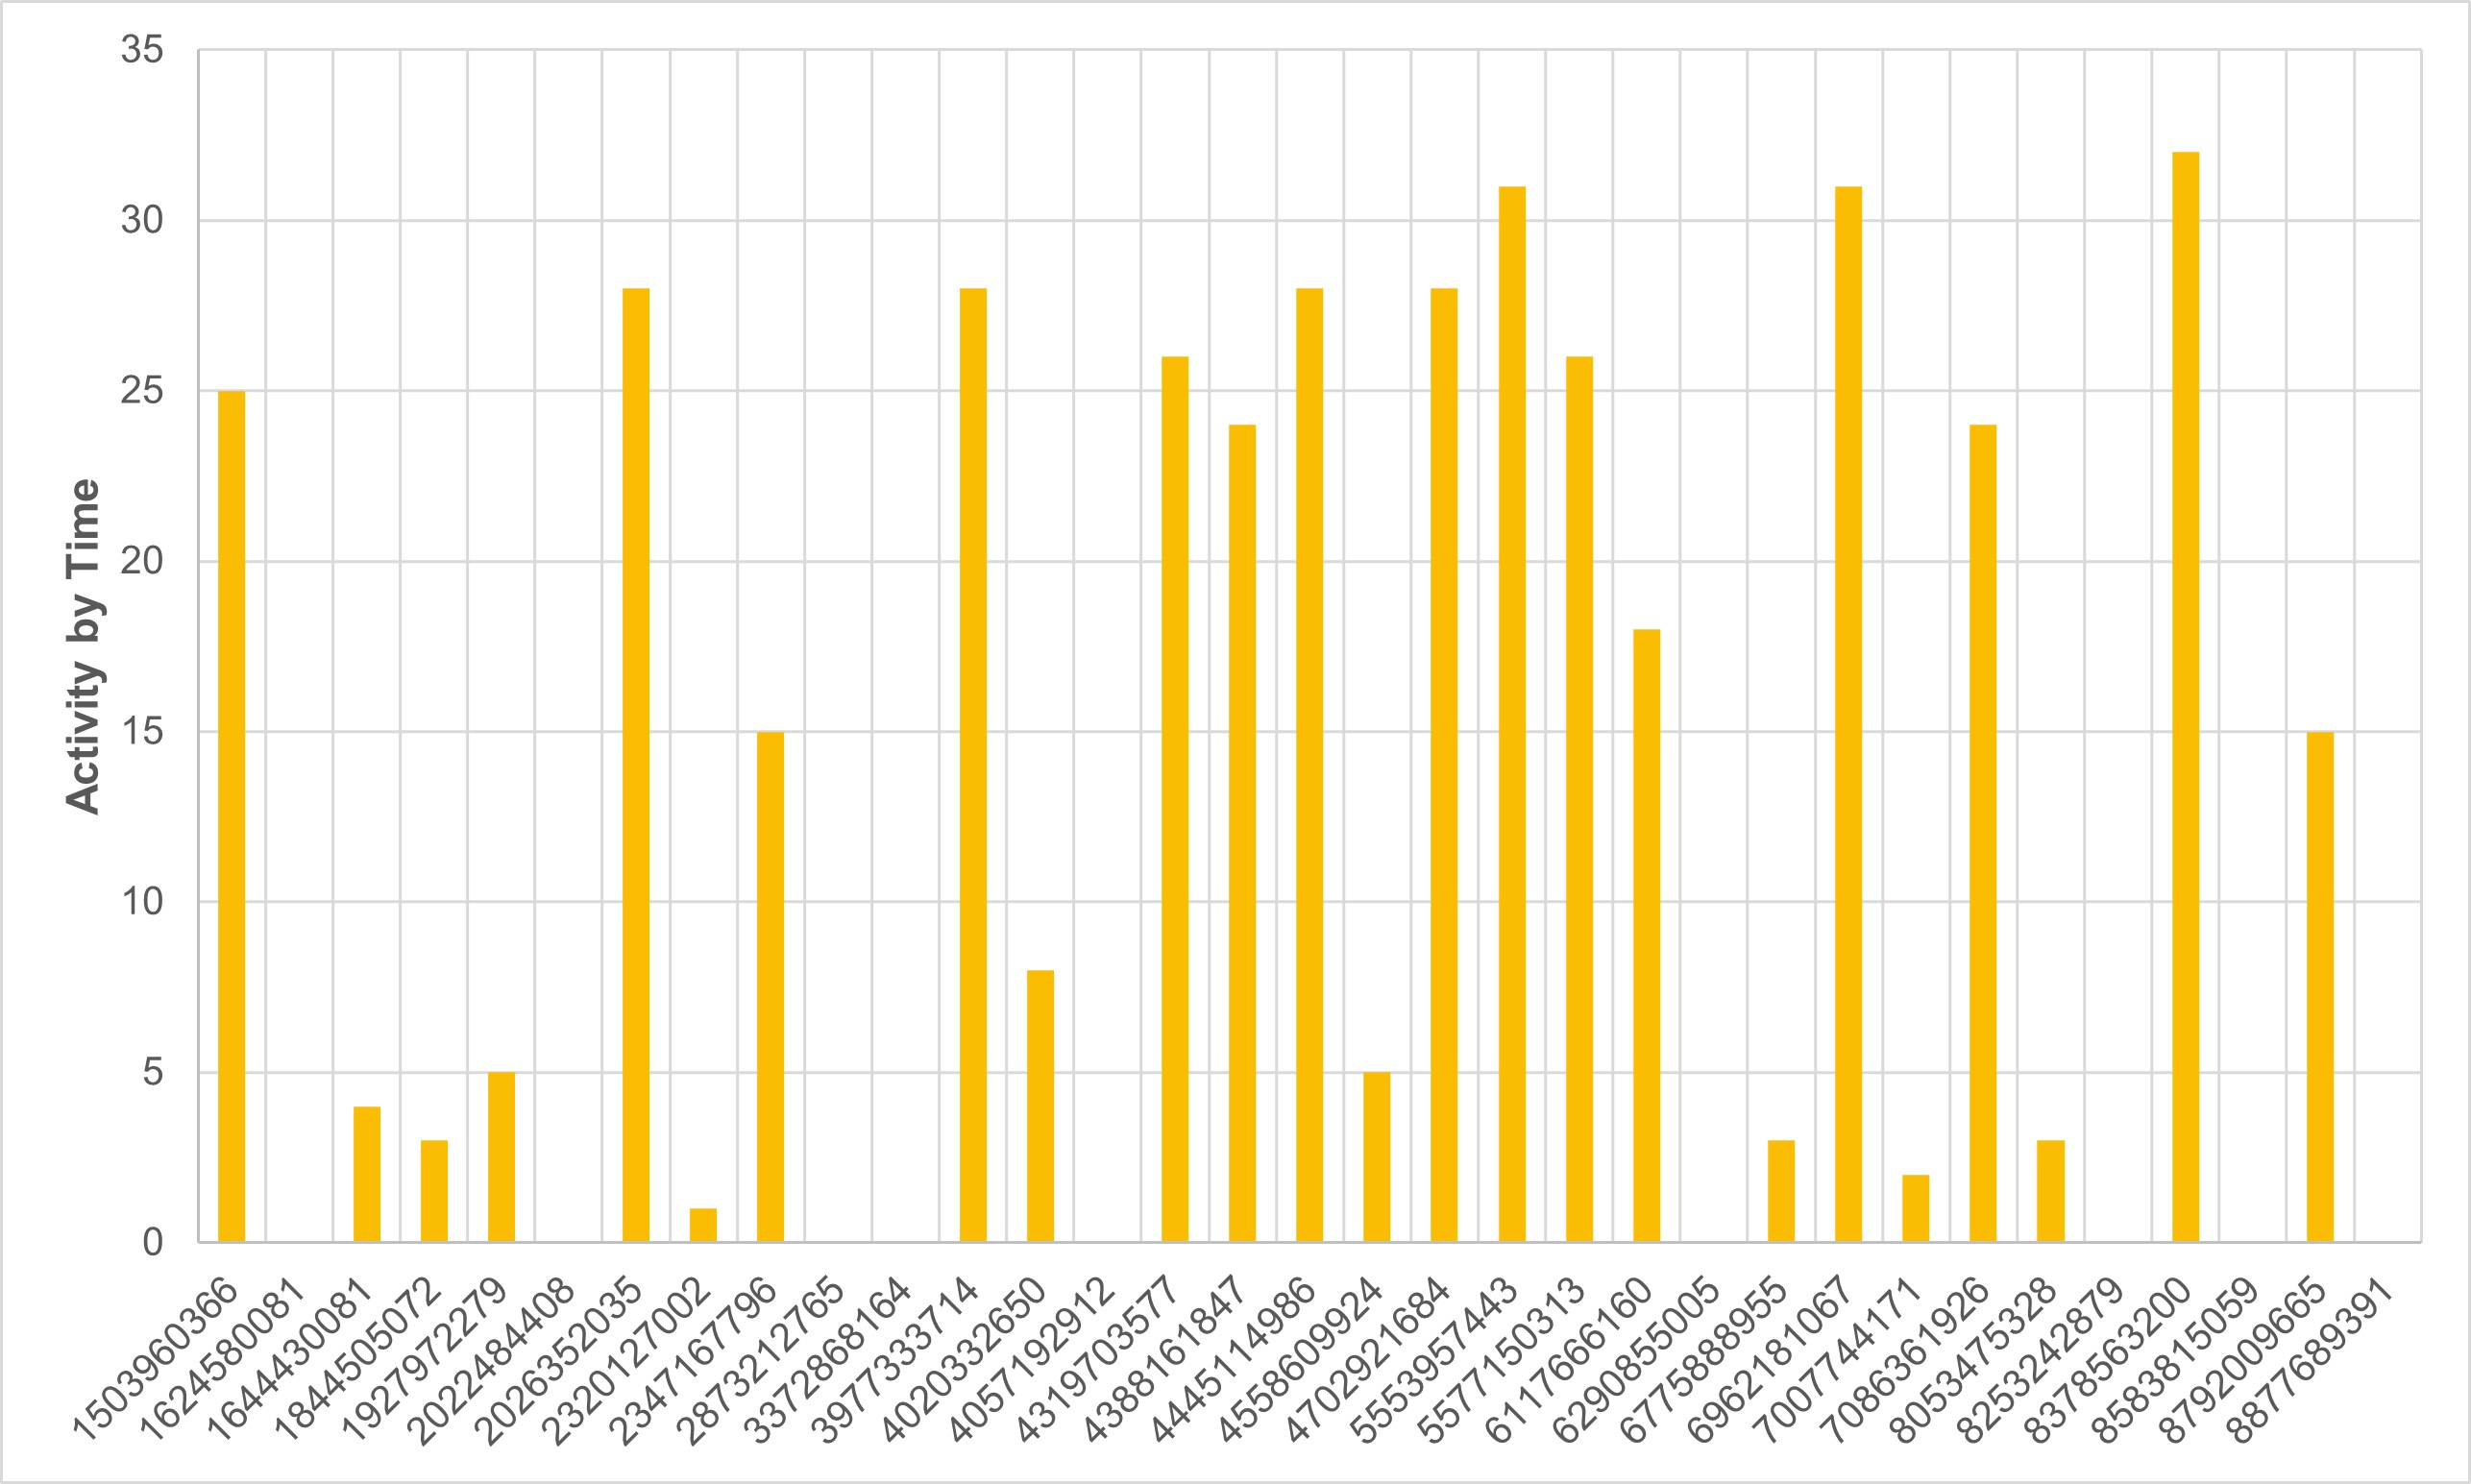

In [39]:
#sleep day usage
from IPython.display import Image
Image(filename = "../input/fitbit-usages-charts/sleep day usage.jpg", width = 500, height = 500)

<a id="2.7"></a> <br>
# 2.7. Weight Log Info

<b>Data Cleaning and Reports:</b>
1. Cleaned and analysed `weightLogInfo_merged` using Microsoft Excel
1. Total users who used this function was 8. Only 3 of them have more than 3 (10% of the max) times of records, 2 users are 24 and 30.
1. Added Id who had no record by using <i>“pasted all the ID and typed 0”, Sort (with same ID together), Delete the duplicate one with 0 using conditional formatting function </i> in order to calculate the data usage of this function
1. Data was counted by day
1. This data contained "Manual Report" option.
1. This data had logid. Confirmed there were 41 logids for Manual Reports, 26 logids for Auto Reports by using Pivat Table functions.


In [40]:
weight_loginfo = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

In [41]:
weight_loginfo.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')

In [42]:
weight_loginfo_usage = pd.read_csv('../input/fitbit-usages/Fitbit_weightloginfo_usage.csv')

In [43]:
weight_loginfo_usage.head(15)

Id  Total Usage
0   1503960366            2
1   1624580081            0
2   1644430081            0
3   1844505072            0
4   1927972279            1
5   2022484408            0
6   2026352035            0
7   2320127002            0
8   2347167796            0
9   2873212765            2
10  3372868164            0
11  3977333714            0
12  4020332650            0
13  4057192912            0
14  4319703577            2

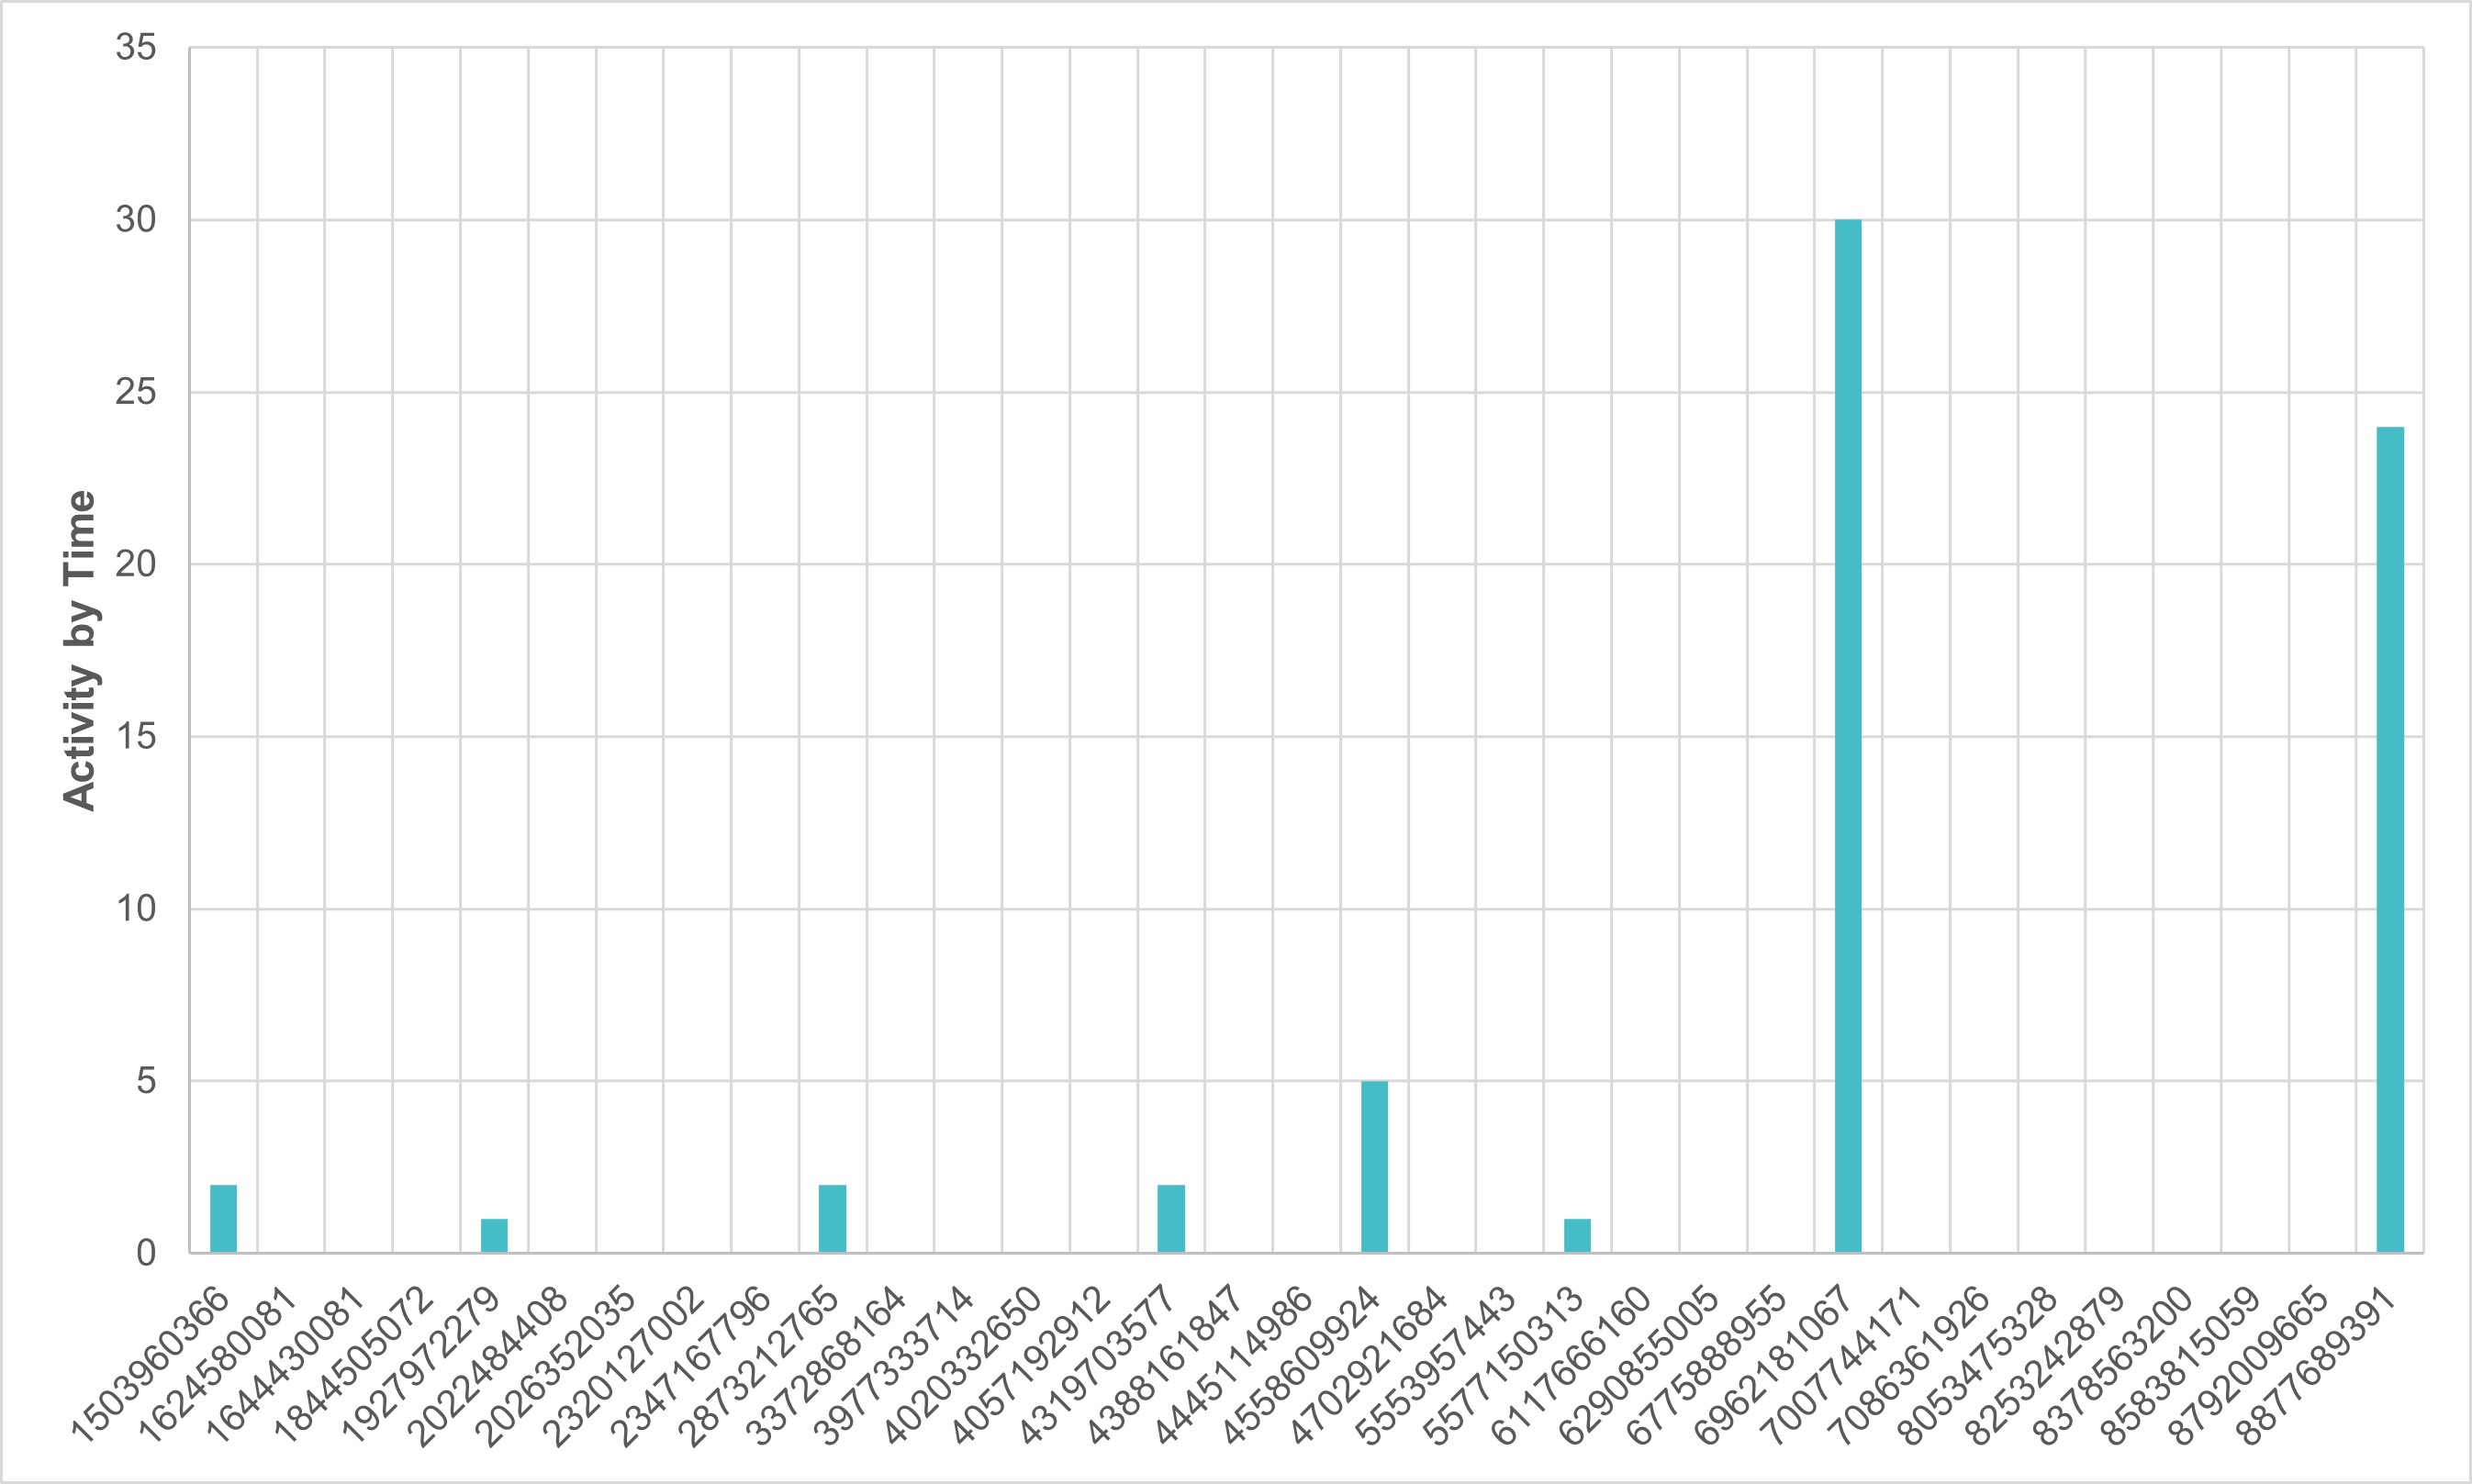

In [44]:
#weight log info usage
from IPython.display import Image
Image(filename = "../input/fitbit-usages-charts/weightinfo usage.jpg", width = 500, height = 500)

<a id="2.8"></a> <br>
# 2.8. Summary and Conclusion for FitBit data

<h4>In order to organize the usages by different functions, I have made a dashboard using Microsoft Excel</h4>
Check out the dashboard by open up the xlsx file below:

[https://www.kaggle.com/datasets/ying2sun/fitbit-dashboard?select=Usage+by+functions_upload.xlsx](https://www.kaggle.com/datasets/ying2sun/fitbit-dashboard?select=Usage+by+functions_upload.xlsx)

<i><font color='blue'>MS Excel function used: Basic Math Formula, Data Validation, VLOOKUP, IF, Chart Design</font></i>
* You can easily select the different functions of FitBit by clicking the arrow, the percentage of usage and the graphic will be automatically changed based on your selection.

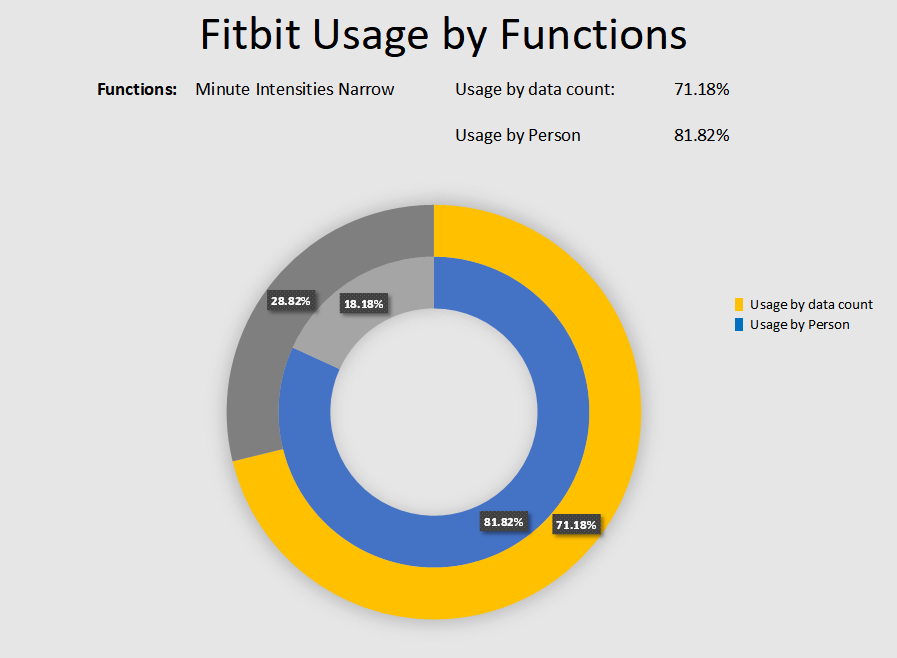

In [45]:
#fitbit dashboard
from IPython.display import Image
Image(filename = "../input/fitbit-dashboard/Usage by functions.png", width = 500, height = 500)

In [46]:
fitbit_dashboard = pd.read_excel("../input/fitbit-dashboard/Usage by functions_upload.xlsx")

<h4><b>The conclusion based on fitbit datasets:</b>

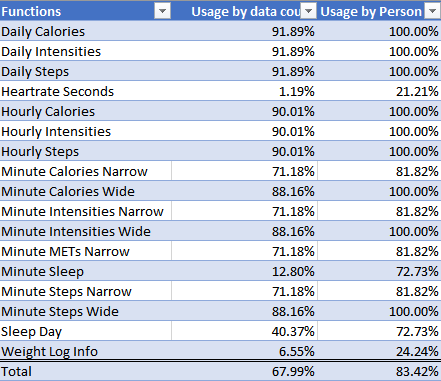

In [47]:
#fitbit dashboard table
from IPython.display import Image
Image(filename = "../input/fitbit-dashboard/Usage by functions_table.png", width = 500, height = 500)

<h4><b>Reports:</b></h4>

1. I opened up all the 18 files by using MS Excel and MySQL based on their sizes.
1. All files contained a column called "Id", I converted them to text from integer
1. The relationship between files I found out were:
 1. The `dailyActivity` included all the daily data, so `dailyCalories`, `dailyIntensities` and `dailySteps` were not necessary – These 3 files had no additional info that `dailyActivity` needed.
 1. All hourly files had the same usage info.
 1. All `Narrow` files had the same usage info, all `Wide` files had the same usage info.    
 1. `minuteSleep_merged` and `sleepDay_merged` had the same users  
1. There were no duplicated and null data
1. There was missing datas
1. `sleepDay_merged` and `weightLogInfo_merged` had logid.
1. `weightLogInfo_merged` had Manual Report function

<h4><b>Questions to be answered:</b></h4>

* What is the background of the 33 users? How many percent of females are there?
* What is the relationship between those data?
* What is the reason for missing data?
* `Heartrate Seconds` and `weightLogInfo` had way lower usage rate than the average usage rate, what was the reason? (A guess, `weightLogInfo` has to be recorded manually; `Heartrate` will only be used when people have concerns on it?)

<a id="3"></a> <br>
# Section 3. Apple Watch and Fitbit Data

<h4><b>In order to take a closer look of females who use fitness trackers, I used the 2nd data set <font color='orange'>"Apple Watch and Fitbit Data".</font></b>

The dataset "Apple Watch and Fitbit Data" recruited a convenience sample of 46 participants (26 women) to wear three devices, a GENEActiv, and Apple Watch Series 2, a Fitbit Charge HR2. Participants completed a 65-minute protocol with 40-minutes of total treadmill time and 25-minutes of sitting or lying time. Indirect calorimetry was used to measure energy expenditure. The outcome variable for the study was the activity class; lying, sitting, walking self-paced, 3 METS, 5 METS, and 7 METS. Minute-by-minute heart rate, steps, distance, and calories from Apple Watch and Fitbit were included in four different machine learning models. Results Our analysis dataset included 3656 and 2608 minutes of Apple Watch and Fitbit data, respectively. We test decision trees, support vector machines, random forest, and rotation forest models. Rotation forest models had the highest classification accuracies at 82.6% for Apple Watch and 89.3% for Fitbit. Classification accuracies for Apple Watch data ranged from 72.5% for sitting to 89.0% for 7 METS. For Fitbit, accuracies varied between 86.2 for sitting to 92.6% for 7 METS. Conclusion This study demonstrated that commercial wearable devices, Apple Watch and Fitbit, were able to predict physical activity type with a reasonable accuracy. The results support the use of minute by minute data from Apple Watch and Fitbit combined machine learning approaches for scalable physical activity type classification at the population level.

<i>Citation: Fuller, Daniel, 2020, "Replication Data for: Using machine learning methods to predict physical activity types with Apple Watch and Fitbit data using indirect calorimetry as the criterion.", https://doi.org/10.7910/DVN/ZS2Z2J, Harvard Dataverse, V1</i>

<i><font color='blue'>Tools: Python</font></i>

In [48]:
aw_fb_data = pd.read_csv('../input/apple-watch-and-fitbit-data/aw_fb_data.csv')

In [49]:
aw_fb_data.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [50]:
# importing pandas
import pandas as pd

# importing csv file and create df for aw_fb_data
aw_fb_dataframe = pd.read_csv('../input/apple-watch-and-fitbit-data/aw_fb_data.csv')

print(aw_fb_dataframe.head())

# obtaining the shape
print("shape of dataframe", aw_fb_dataframe.shape)

# obtaining the number of rows
print("number of rows : ", aw_fb_dataframe.shape[0])

# obtaining the number of columns
print("number of columns : ", aw_fb_dataframe.shape[1])


   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [51]:
#use 'gender' as condition to return values
female=len(aw_fb_dataframe[aw_fb_dataframe['gender']==0])
print("The total record number of female is:", female)
total=len(aw_fb_dataframe)
female_percentage = '{0:.2f}'.format((female/total*100))
print("The total percentage of female record is:", female_percentage)

The total record number of female is: 3279
The total percentage of female record is: 52.35


* It brings up the first question to me: what is the reason that the female record is more than the male record? According to the dataset summary, there are 46 participants (26 female, 20 male), what is the reason that makes the difference between the genders.

In order to get more inside of female users of this dataset, I decided to analyze the record for female only.

In addition, since this dataset contains 2 kinds of fitness trackers - "apple watch" and "fitbit", let's see if there is any difference of function between those 2 trackers. 

In [52]:
# importing pandas
import pandas as pd

# importing csv file for apple watch and create dataframe for reviewing
data_for_weka_aw = pd.read_csv('../input/apple-watch-and-fitbit-data/data_for_weka_aw.csv')

print(data_for_weka_aw.head())

# obtaining the shape
print("shape of dataframe", data_for_weka_aw.shape)

# obtaining the number of rows
print("number of rows : ", data_for_weka_aw.shape[0])

# obtaining the number of columns
print("number of columns : ", data_for_weka_aw.shape[1])


   Unnamed: 0  age  gender  height  weight  Applewatch.Steps_LE  \
0           1   20       1   168.0    65.4            10.771429   
1           2   20       1   168.0    65.4            11.475325   
2           3   20       1   168.0    65.4            12.179221   
3           4   20       1   168.0    65.4            12.883117   
4           5   20       1   168.0    65.4            13.587013   

   Applewatch.Heart_LE  Applewatch.Calories_LE  Applewatch.Distance_LE  \
0            78.531302                0.344533                0.008327   
1            78.453390                3.287625                0.008896   
2            78.540825                9.484000                0.009466   
3            78.628260               10.154556                0.010035   
4            78.715695               10.825111                0.010605   

   EntropyApplewatchHeartPerDay_LE  EntropyApplewatchStepsPerDay_LE  \
0                         6.221612                         6.116349   
1         

In [53]:
# importing pandas
import pandas as pd

# importing csv file for fitbit and create dataframe for reviewing
data_for_weka_fb = pd.read_csv('../input/apple-watch-and-fitbit-data/data_for_weka_fb.csv')

print(data_for_weka_fb.head())

# obtaining the shape
print("shape of dataframe", data_for_weka_fb.shape)

# obtaining the number of rows
print("number of rows : ", data_for_weka_fb.shape[0])

# obtaining the number of columns
print("number of columns : ", data_for_weka_fb.shape[1])

   Unnamed: 0  age  gender  height  weight  Fitbit.Steps_LE  Fitbit.Heart_LE  \
0           1   20       1   168.0    65.4              1.0       132.000000   
1           2   20       1   168.0    65.4              1.0       132.777778   
2           3   20       1   168.0    65.4              1.0       129.888889   
3           4   20       1   168.0    65.4              1.0       129.142857   
4          11   20       1   168.0    65.4              1.0       134.555556   

   Fitbit.Calories_LE  Fitbit.Distance_LE  EntropyFitbitHeartPerDay_LE  \
0                 1.0                 1.0                     5.938588   
1                 1.0                 1.0                     5.938588   
2                 1.0                 1.0                     5.938588   
3                 1.0                 1.0                     5.938588   
4                 3.5                 1.0                     5.938588   

   EntropyFitbitStepsPerDay_LE  RestingFitbitHeartrate_LE  \
0            

* Look like both of apple watch and fitbit in this dataset are using the same functions for tracking records. Then I figured out the aw_fb_data was combined by data_for_weka_aw and data_for_weka_fb based on different devices. This time, I will analyze the aw_fb_data for Apple Watch first.

In [54]:
# importing pandas
import pandas as pd

aw_fb_data_female = pd.read_csv('../input/applewatch-cleaned/aw_fb_data_female.csv')

#use 'device' as condition to return values for female with apple watch
aw_count=len(aw_fb_data_female[aw_fb_data_female['device']=="apple watch"])
print("The total female record number of apple watch is:", aw_count)

female_total=len(aw_fb_data_female)
aw_percentage = '{0:.2f}'.format((aw_count/female_total*100))
print("The percentage of female apple watch record is:", aw_percentage)


#use 'device' as condition to return values for female with fitbit
fb_count=len(aw_fb_data_female[aw_fb_data_female['device']=="fitbit"])
print("The total female record number of fitbit is:", fb_count)

female_total=len(aw_fb_data_female)
fb_percentage = '{0:.2f}'.format((fb_count/female_total*100))
print("The percentage of female fitbit record is:", fb_percentage)


The total female record number of apple watch is: 1925
The percentage of female apple watch record is: 58.71
The total female record number of fitbit is: 1354
The percentage of female fitbit record is: 41.29


Fitbit records are 571 less than Apple Watch.

We can see the age range of females who use Apple Watch as the fitness tracker.

[Text(0, 0, '69'),
 Text(0, 0, '77'),
 Text(0, 0, '148'),
 Text(0, 0, '73'),
 Text(0, 0, '372'),
 Text(0, 0, '147'),
 Text(0, 0, '144'),
 Text(0, 0, '225'),
 Text(0, 0, '76'),
 Text(0, 0, '74'),
 Text(0, 0, '153'),
 Text(0, 0, '72'),
 Text(0, 0, '75'),
 Text(0, 0, '72'),
 Text(0, 0, '72'),
 Text(0, 0, '76')]

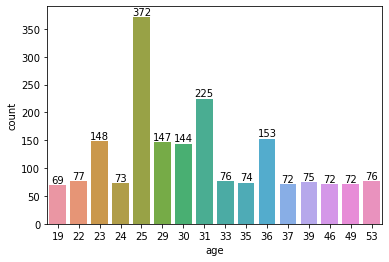

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# filter the row
aw = aw_fb_data_female[aw_fb_data_female['device'] =="apple watch"] 

ax = sns.countplot(x='age', data=aw)
ax.bar_label(ax.containers[0])

Let's take a look the fitbit usage for female:

[Text(0, 0, '69'),
 Text(0, 0, '56'),
 Text(0, 0, '40'),
 Text(0, 0, '73'),
 Text(0, 0, '202'),
 Text(0, 0, '134'),
 Text(0, 0, '144'),
 Text(0, 0, '145'),
 Text(0, 0, '76'),
 Text(0, 0, '74'),
 Text(0, 0, '153'),
 Text(0, 0, '72'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '22'),
 Text(0, 0, '76')]

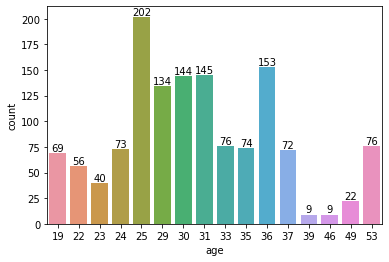

In [56]:
# selecting rows based on condition 
fb = aw_fb_data_female[aw_fb_data_female['device'] =="fitbit"] 

ax = sns.countplot(x='age', data=fb)
ax.bar_label(ax.containers[0])

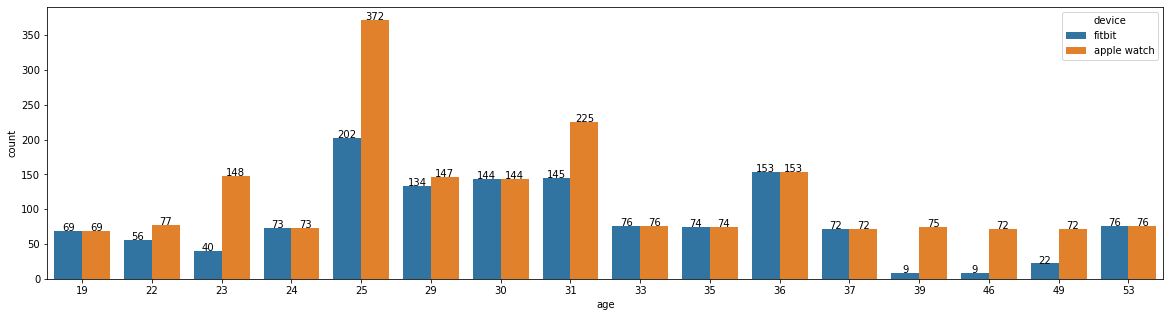

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(20,5)) #change size for chart
graph = sns.countplot(x='age', hue='device', data=aw_fb_data_female)
for container in ax.containers:
    ax.bar_label(container)
for p in graph.patches:  #add text on the top
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Regarding the comparison, Apple Watch has more records than the Fitbit for all of the ages.

<AxesSubplot:ylabel='Activity'>

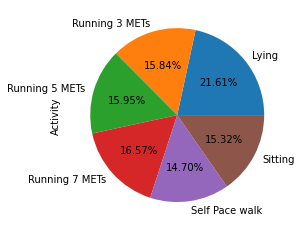

In [58]:
aw = aw_fb_data_female[aw_fb_data_female['device'] =="apple watch"] 
aw.activity.str.get_dummies().sum().plot.pie(label='Activity', autopct='%1.2f%%')

<AxesSubplot:ylabel='Activity'>

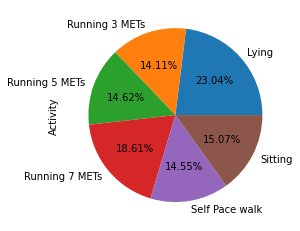

In [59]:
fb = aw_fb_data_female[aw_fb_data_female['device'] =="fitbit"] 
fb.activity.str.get_dummies().sum().plot.pie(label='Activity', autopct='%1.2f%%')

The pie charts below show both of Apple Watch and FitBit did great job on tracking users' activities.

It is also a sign that showing most of the activities can be tracked automatically. (Remember the dataset `weightLogInfo_merged` had Manual Report options? [Weight Log Info](#2.7))


<a id="4"></a> <br>
# Section 4. Conclusion and Suggestion

<h4><b>My Conlusion:</b>

    
1. According to Statista "End-user spending on wearable devices worldwide from 2019 to 2022": Global end-user spending on wearable device is expected to amount to about 81.5 billion U.S. dollars in 2021, with forecasts suggesting that the spending will reach more than 90 billion dollars by 2022. Smartwatches, head-mounted displays, and ear-worn devices are the products that lead the growth of the market. The wearables market also includes wristbands, smart clothing, and smart patches. 
    
    https://www.statista.com/statistics/1065284/wearable-devices-worldwide-spending/

1. Accroding to axios: As 2020 begins – and health-related New Year’s resolutions take effect – roughly one-in-five U.S. adults (21%) say they regularly wear a smart watch or wearable fitness tracker, according to a Pew Research Center survey conducted June 3-17, 2019.
    
    https://www.axios.com/2020/01/13/fitness-trackers-women-wearables
    
1. The smart device is worth investing in, especially for women.

<h4><b>My Suggestion:</b>
    
1. As the 15 underlying causes of death for women shows: [Section 1: Introduction to Python](#1), Bellabeat can invest in a smart device that more focuses on women's health issues.

1. According to the dataset "Apple Watch and Fitbit Data", some functions for women only like menstrual flow can be monitored by the trackers automatically. 
    
1. In order to make Bellabeat smart devices more automatically, Bellabeat can invest in some formula that can use current health data to calculate other "manually" functions especially for women.    
1. According to NBC News, the customers consider the comfort, wearability and style over robust data metrics when buying a fitness tracker.
    
    https://www.nbcnews.com/select/shopping/best-fitness-trackers-smartwatches-ncna1289352
    
    In order to be competitive with other fitness trackers, Bellabeat needs to be more focused on women's issues, and new functions based on women's needs.

<i>This is the end of my case study, actually my very first of case study. :D </i>